In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as seaborn
from collections import Counter
import math
import glob

## 유동인구 데이터 분석
-  공공데이터에서 갖고온 산업체 대분류별 종사자 수 데이터와 세대수 데이터를 갖고와서 행정동별 이해를 높이는 것이 목적

In [ ]:
os.chdir('C:/Users/Rangkku/Desktop/bigcon/people/')

-  종사자 수 데이터 생성  후 유동인구 데이터와 결합 
-  종사자 수 데이터의 경우 업종별 총 종사자 수와 여성 종사자 수만 나와 있음 따라서 두 칼럼의 차인 남성 종사자수 칼럼을 새로 생성
-  이후 이 데이터를 기존의 유동인구 데이터와 결합하여 의사결정나무 분석을 하고 자 함
-  또한 그 전에 기본적인 탐색적 자료 분석을 하는것이 선행되어야 함. 따라서 종로구, 노원구만 가지고 빈도분석 하는 것이 필요해보임


In [ ]:
labor = pd.read_csv("labor.txt",sep = "\t") ## 산업체 대분류별 종사자 수
lb = labor
lb.columns

Index(['기간', '자치구', '동', '합계', '합계.1', '합계.2', '농업 임업 및 어업', '농업 임업 및 어업.1',
       '광업', '광업.1', '제조업', '제조업.1', '전기 가스 증기 및 공기조절 공급업',
       '전기 가스 증기 및 공기조절 공급업.1', '수도 하수 및 폐기물 처리 원료 재생업',
       '수도 하수 및 폐기물 처리 원료 재생업.1', '건설업', '건설업.1', '도매 및 소매업', '도매 및 소매업.1',
       '운수 및 창고업', '운수 및 창고업.1', '숙박 및 음식점업', '숙박 및 음식점업.1', '정보통신업',
       '정보통신업.1', '금융 및 보험업', '금융 및 보험업.1', '부동산업', '부동산업.1',
       '전문 과학 및 기술 서비스업', '전문 과학 및 기술 서비스업.1', '사업시설 관리 사업 지원 및 임대 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업.1', '공공행정 국방 및 사회보장 행정', '공공행정 국방 및 사회보장 행정.1',
       '교육 서비스업', '교육 서비스업.1', '보건업 및 사회복지 서비스업', '보건업 및 사회복지 서비스업.1',
       '예술 스포츠 및 여가관련 서비스업', '예술 스포츠 및 여가관련 서비스업.1', '협회 및 단체 수리 및 기타 개인 서비스업',
       '협회 및 단체 수리 및 기타 개인 서비스업.1'],
      dtype='object')

In [ ]:
lb.head()

,기간,자치구,동,합계,합계.1,합계.2,농업 임업 및 어업,농업 임업 및 어업.1,광업,광업.1,...,공공행정 국방 및 사회보장 행정,공공행정 국방 및 사회보장 행정.1,교육 서비스업,교육 서비스업.1,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업.1,예술 스포츠 및 여가관련 서비스업,예술 스포츠 및 여가관련 서비스업.1,협회 및 단체 수리 및 기타 개인 서비스업,협회 및 단체 수리 및 기타 개인 서비스업.1
0,기간,자치구,동,사업체수,총종사자수,여성종사자수,계,여성종사자수,계,여성종사자수,...,계,여성종사자수,계,여성종사자수,계,여성종사자수,계,여성종사자수,계,여성종사자수
1,2017,합계,합계,"822,863","5,119,913","2,271,763",469,88,66,8,...,"138,150","49,489","341,732","210,109","358,563","284,717","86,452","39,622","190,963","96,989"
2,2017,종로구,소계,"40,490","268,702","114,602",30,10,10,2,...,"16,504","4,978","13,317","7,437","15,954","11,787","6,198","2,940","8,275","3,722"
3,2017,종로구,사직동,"3,544","52,489","21,460",16,4,-,-,...,"7,667","2,548",898,549,764,588,"1,546",708,920,464
4,2017,종로구,삼청동,753,"4,507","2,282",-,-,-,-,...,"1,229",279,279,148,28,22,172,116,216,132


In [ ]:
lb = lb.loc[(lb.자치구 == '종로구')|(lb.자치구 == '노원구')]##종로구 노원구만 인덱싱
lb =  lb.reset_index(drop = True)
lb.head()

,기간,자치구,동,합계,합계.1,합계.2,농업 임업 및 어업,농업 임업 및 어업.1,광업,광업.1,...,공공행정 국방 및 사회보장 행정,공공행정 국방 및 사회보장 행정.1,교육 서비스업,교육 서비스업.1,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업.1,예술 스포츠 및 여가관련 서비스업,예술 스포츠 및 여가관련 서비스업.1,협회 및 단체 수리 및 기타 개인 서비스업,협회 및 단체 수리 및 기타 개인 서비스업.1
0,2017,종로구,소계,"40,490","268,702","114,602",30,10,10,2,...,"16,504","4,978","13,317","7,437","15,954","11,787","6,198","2,940","8,275","3,722"
1,2017,종로구,사직동,"3,544","52,489","21,460",16,4,-,-,...,"7,667","2,548",898,549,764,588,"1,546",708,920,464
2,2017,종로구,삼청동,753,"4,507","2,282",-,-,-,-,...,"1,229",279,279,148,28,22,172,116,216,132
3,2017,종로구,부암동,567,"4,147","2,010",-,-,5,1,...,58,9,"1,543",832,153,129,73,46,806,227
4,2017,종로구,평창동,739,"3,547","1,868",-,-,-,-,...,77,29,661,377,385,315,167,74,303,161


In [ ]:
lb= lb.rename(columns={'합계': '사업체 수', '합계.1': '총 종사자 수','합계.2':'여성 종사자 수'})

In [ ]:
lb_t = lb.copy()
for i in range(len(lb_t.columns)): ### 이름 변경 .1 에서 여성종사자 수로 
    if '1' in lb_t.columns[i]:
        lb =  lb.rename(columns= {lb_t.columns[i]:lb_t.columns[i-1]+' 여성 종사자 수'})
#     df_sex_t.iloc[i,1] = df_sex_t.iloc[i,1].replace(".",",")
# lb_t.head(2)

In [ ]:
lb_t.head(2)

,기간,자치구,동,사업체 수,총 종사자 수,여성 종사자 수,농업 임업 및 어업,농업 임업 및 어업.1,광업,광업.1,...,공공행정 국방 및 사회보장 행정,공공행정 국방 및 사회보장 행정.1,교육 서비스업,교육 서비스업.1,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업.1,예술 스포츠 및 여가관련 서비스업,예술 스포츠 및 여가관련 서비스업.1,협회 및 단체 수리 및 기타 개인 서비스업,협회 및 단체 수리 및 기타 개인 서비스업.1
0,2017,종로구,소계,"40,490","268,702","114,602",30,10,10,2,...,"16,504","4,978","13,317","7,437","15,954","11,787","6,198","2,940","8,275","3,722"
1,2017,종로구,사직동,"3,544","52,489","21,460",16,4,-,-,...,"7,667","2,548",898,549,764,588,"1,546",708,920,464


In [ ]:
col_ht = [lb_t.columns[x] for x in range(4,43,2)]
col_ht

['총 종사자 수',
 '농업 임업 및 어업',
 '광업',
 '제조업',
 '전기 가스 증기 및 공기조절 공급업',
 '수도 하수 및 폐기물 처리 원료 재생업',
 '건설업',
 '도매 및 소매업',
 '운수 및 창고업',
 '숙박 및 음식점업',
 '정보통신업',
 '금융 및 보험업',
 '부동산업',
 '전문 과학 및 기술 서비스업',
 '사업시설 관리 사업 지원 및 임대 서비스업',
 '공공행정 국방 및 사회보장 행정',
 '교육 서비스업',
 '보건업 및 사회복지 서비스업',
 '예술 스포츠 및 여가관련 서비스업',
 '협회 및 단체 수리 및 기타 개인 서비스업']

In [ ]:
# finedust_hour['weekend'] = finedust_hour['tm'].apply(lambda x: 1 if (x.weekday() >= 5) or (x.date() in holiday) else 0)

In [ ]:
## 데이터중  - 로 되어 있는 데이터 0으로 바꾸기
for i in range(len(lb_t.columns)):
     lb_t[lb_t.columns[i]] = lb_t[lb_t.columns[i]].apply(lambda x : 0 if x == '-' else x)

In [ ]:
for  i in col_ht:
    if '여성' in i : 
        continue
    else : 
        print(i+' 남성 종사자 수')

총 종사자 수 남성 종사자 수
농업 임업 및 어업 남성 종사자 수
광업 남성 종사자 수
제조업 남성 종사자 수
전기 가스 증기 및 공기조절 공급업 남성 종사자 수
수도 하수 및 폐기물 처리 원료 재생업 남성 종사자 수
건설업 남성 종사자 수
도매 및 소매업 남성 종사자 수
운수 및 창고업 남성 종사자 수
숙박 및 음식점업 남성 종사자 수
정보통신업 남성 종사자 수
금융 및 보험업 남성 종사자 수
부동산업 남성 종사자 수
전문 과학 및 기술 서비스업 남성 종사자 수
사업시설 관리 사업 지원 및 임대 서비스업 남성 종사자 수
공공행정 국방 및 사회보장 행정 남성 종사자 수
교육 서비스업 남성 종사자 수
보건업 및 사회복지 서비스업 남성 종사자 수
예술 스포츠 및 여가관련 서비스업 남성 종사자 수
협회 및 단체 수리 및 기타 개인 서비스업 남성 종사자 수


In [ ]:
lb_t.columns

Index(['기간', '자치구', '동', '사업체 수', '총 종사자 수', '여성 종사자 수', '농업 임업 및 어업',
       '농업 임업 및 어업.1', '광업', '광업.1', '제조업', '제조업.1', '전기 가스 증기 및 공기조절 공급업',
       '전기 가스 증기 및 공기조절 공급업.1', '수도 하수 및 폐기물 처리 원료 재생업',
       '수도 하수 및 폐기물 처리 원료 재생업.1', '건설업', '건설업.1', '도매 및 소매업', '도매 및 소매업.1',
       '운수 및 창고업', '운수 및 창고업.1', '숙박 및 음식점업', '숙박 및 음식점업.1', '정보통신업',
       '정보통신업.1', '금융 및 보험업', '금융 및 보험업.1', '부동산업', '부동산업.1',
       '전문 과학 및 기술 서비스업', '전문 과학 및 기술 서비스업.1', '사업시설 관리 사업 지원 및 임대 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업.1', '공공행정 국방 및 사회보장 행정', '공공행정 국방 및 사회보장 행정.1',
       '교육 서비스업', '교육 서비스업.1', '보건업 및 사회복지 서비스업', '보건업 및 사회복지 서비스업.1',
       '예술 스포츠 및 여가관련 서비스업', '예술 스포츠 및 여가관련 서비스업.1', '협회 및 단체 수리 및 기타 개인 서비스업',
       '협회 및 단체 수리 및 기타 개인 서비스업.1'],
      dtype='object')

In [ ]:
type(lb_t['광업'][1])
# apply(lambda x : 0 if x == '-' else x)

int

In [ ]:
for i in range(len(lb_t)):
    lb_t.iloc[i,1] = lb_t.iloc[i,1].replace(",","")

In [ ]:
x = '10,490'
print(type(x))
x.replace(",","")

<class 'str'>


'10490'

In [ ]:
lb_t.columns

Index(['기간', '자치구', '동', '사업체 수', '총 종사자 수', '여성 종사자 수', '농업 임업 및 어업',
       '농업 임업 및 어업.1', '광업', '광업.1', '제조업', '제조업.1', '전기 가스 증기 및 공기조절 공급업',
       '전기 가스 증기 및 공기조절 공급업.1', '수도 하수 및 폐기물 처리 원료 재생업',
       '수도 하수 및 폐기물 처리 원료 재생업.1', '건설업', '건설업.1', '도매 및 소매업', '도매 및 소매업.1',
       '운수 및 창고업', '운수 및 창고업.1', '숙박 및 음식점업', '숙박 및 음식점업.1', '정보통신업',
       '정보통신업.1', '금융 및 보험업', '금융 및 보험업.1', '부동산업', '부동산업.1',
       '전문 과학 및 기술 서비스업', '전문 과학 및 기술 서비스업.1', '사업시설 관리 사업 지원 및 임대 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업.1', '공공행정 국방 및 사회보장 행정', '공공행정 국방 및 사회보장 행정.1',
       '교육 서비스업', '교육 서비스업.1', '보건업 및 사회복지 서비스업', '보건업 및 사회복지 서비스업.1',
       '예술 스포츠 및 여가관련 서비스업', '예술 스포츠 및 여가관련 서비스업.1', '협회 및 단체 수리 및 기타 개인 서비스업',
       '협회 및 단체 수리 및 기타 개인 서비스업.1'],
      dtype='object')

In [ ]:
lb_cht = lb_t[lb_t['동']=='소계']
lb_cht = lb_cht[['자치구','총 종사자 수',
 '농업 임업 및 어업',
 '광업',
 '제조업',
 '전기 가스 증기 및 공기조절 공급업',
 '수도 하수 및 폐기물 처리 원료 재생업',
 '건설업',
 '도매 및 소매업',
 '운수 및 창고업',
 '숙박 및 음식점업',
 '정보통신업',
 '금융 및 보험업',
 '부동산업',
 '전문 과학 및 기술 서비스업',
 '사업시설 관리 사업 지원 및 임대 서비스업',
 '공공행정 국방 및 사회보장 행정',
 '교육 서비스업',
 '보건업 및 사회복지 서비스업',
 '예술 스포츠 및 여가관련 서비스업',
 '협회 및 단체 수리 및 기타 개인 서비스업']]

In [ ]:
group_sizes = list(lb_cht.iloc[1][2:])
group_names = list(lb_cht.columns[2:])
group_explodes = ()

In [ ]:
lb_cht.columns[1:]

Index(['총 종사자 수', '농업 임업 및 어업', '광업', '제조업', '전기 가스 증기 및 공기조절 공급업',
       '수도 하수 및 폐기물 처리 원료 재생업', '건설업', '도매 및 소매업', '운수 및 창고업', '숙박 및 음식점업',
       '정보통신업', '금융 및 보험업', '부동산업', '전문 과학 및 기술 서비스업',
       '사업시설 관리 사업 지원 및 임대 서비스업', '공공행정 국방 및 사회보장 행정', '교육 서비스업',
       '보건업 및 사회복지 서비스업', '예술 스포츠 및 여가관련 서비스업', '협회 및 단체 수리 및 기타 개인 서비스업'],
      dtype='object')

In [ ]:
len(group_names )

19

In [ ]:
len(group_sizes)

19

In [ ]:
# list(lb_cht.columns)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['figure.figsize'] = [12, 8]


In [ ]:
lb_cnt = labor[labor['동']=='소계']
lb_cnt = lb_cnt[['자치구','총 종사자 수',
 '농업 임업 및 어업',
 '광업',
 '제조업',
 '전기 가스 증기 및 공기조절 공급업',
 '수도 하수 및 폐기물 처리 원료 재생업',
 '건설업',
 '도매 및 소매업',
 '운수 및 창고업',
 '숙박 및 음식점업',
 '정보통신업',
 '금융 및 보험업',
 '부동산업',
 '전문 과학 및 기술 서비스업',
 '사업시설 관리 사업 지원 및 임대 서비스업',
 '공공행정 국방 및 사회보장 행정',
 '교육 서비스업',
 '보건업 및 사회복지 서비스업',
 '예술 스포츠 및 여가관련 서비스업',
 '협회 및 단체 수리 및 기타 개인 서비스업']]

In [ ]:
lb_cnt = lb_cnt.T
lb_cnt

,0,18
자치구,종로구,노원구
총 종사자 수,268702,117859
농업 임업 및 어업,30,2
광업,10,0
제조업,13078,4042
전기 가스 증기 및 공기조절 공급업,363,214
수도 하수 및 폐기물 처리 원료 재생업,136,162
건설업,30754,2431
도매 및 소매업,44263,15534
운수 및 창고업,6818,12677


In [ ]:
lb_cnt.columns

Int64Index([0, 18], dtype='int64')

In [ ]:
No= lb_cnt.iloc[1:,1]
No.sort_values(ascending=False)

총 종사자 수                    117859
교육 서비스업                     21222
보건업 및 사회복지 서비스업             18404
도매 및 소매업                    15534
숙박 및 음식점업                   14211
운수 및 창고업                    12677
협회 및 단체 수리 및 기타 개인 서비스업      5495
사업시설 관리 사업 지원 및 임대 서비스업      5110
부동산업                         4574
금융 및 보험업                     4315
제조업                          4042
공공행정 국방 및 사회보장 행정            3042
예술 스포츠 및 여가관련 서비스업           2852
건설업                          2431
전문 과학 및 기술 서비스업              2339
정보통신업                        1233
전기 가스 증기 및 공기조절 공급업           214
수도 하수 및 폐기물 처리 원료 재생업         162
농업 임업 및 어업                      2
광업                              0
Name: 18, dtype: object

In [ ]:
jong= lb_cnt.iloc[1:,0]
jong.sort_values(ascending=False)[:6]

총 종사자 수            268702
도매 및 소매업            44263
건설업                 30754
숙박 및 음식점업           26577
금융 및 보험업            21634
전문 과학 및 기술 서비스업     20315
Name: 0, dtype: object

In [ ]:
jong.sort_values(ascending=False)[:6].index

Index(['총 종사자 수', '도매 및 소매업', '건설업', '숙박 및 음식점업', '금융 및 보험업',
       '전문 과학 및 기술 서비스업'],
      dtype='object')

- 노원 top5 산업체 종사자 

교육 서비스업                     21222 >
보건업 및 사회복지 서비스업       18404 >
도매 및 소매업                    15534 >
숙박 및 음식점업                   14211 >
운수 및 창고업                    12677

- 종로 top5 산업체 종사자 

도매 및 소매업                    44263 >
건설업                         30754 >
숙박 및 음식점업                   26577 >
금융 및 보험업                    21634 >
전문 과학 및 기술 서비스업             20315

In [ ]:
nowon = list(lb_cht.iloc[1][:]);nowon

['노원구',
 '117,859',
 '2',
 0,
 '4,042',
 '214',
 '162',
 '2,431',
 '15,534',
 '12,677',
 '14,211',
 '1,233',
 '4,315',
 '4,574',
 '2,339',
 '5,110',
 '3,042',
 '21,222',
 '18,404',
 '2,852',
 '5,495']

In [ ]:
# import matplotlib.pyplot as plt
# group_sizes = list(lb_cht.iloc[1][2:])
# plt.pie(group_sizes, 
#         labels=group_names) # text font size
# plt.title("노원구 업종별 종사자 수")

In [ ]:
def make_pie(group_size):
    import matplotlib.pyplot as plt
    group_sizes = list(group_size)
    plt.pie(group_sizes, labels=group_size.index) # text font size
    plt.savefig("fig.png")

In [ ]:
labor=pd.read_csv("labor_all.csv",encoding="euc-kr")

In [ ]:
lbr= labor[['동',
 '농업 임업 및 어업',
 '광업',
 '제조업',
 '전기 가스 증기 및 공기조절 공급업',
 '수도 하수 및 폐기물 처리 원료 재생업',
 '건설업',
 '도매 및 소매업',
 '운수 및 창고업',
 '숙박 및 음식점업',
 '정보통신업',
 '금융 및 보험업',
 '부동산업',
 '전문 과학 및 기술 서비스업',
 '사업시설 관리 사업 지원 및 임대 서비스업',
 '공공행정 국방 및 사회보장 행정',
 '교육 서비스업',
 '보건업 및 사회복지 서비스업',
 '예술 스포츠 및 여가관련 서비스업',
 '협회 및 단체 수리 및 기타 개인 서비스업']]

In [ ]:
lbr_cnt = lbr[lbr['동']!='소계']

In [ ]:
lbr_cnt =  lbr_cnt.T


In [ ]:
lbr_cnt.head()


동,사직동,삼청동,부암동,평창동,무악동,교남동,가회동,종로1.2.3.4가동,종로5·6가동,이화동,...,상계1동,상계2동,상계5동,상계8동,상계9동,상계10동,상계3.4동,상계6.7동,중계2.3동,공릉1동
농업 임업 및 어업,16,0,0,0,0,0,0,0,1,13,...,0,0,0,0,0,0,0,0,0,0
광업,0,0,5,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
제조업,217,82,122,101,11,15,287,5316,2696,339,...,249,285,420,10,10,2,311,44,75,736
전기 가스 증기 및 공기조절 공급업,8,0,0,0,0,0,0,353,0,2,...,0,0,0,0,0,0,0,214,0,0
수도 하수 및 폐기물 처리 원료 재생업,31,0,0,0,0,0,0,18,0,0,...,26,14,22,0,0,22,0,0,0,78


In [ ]:
lbr_cnt.iloc[0]

1             사직동
2             삼청동
3             부암동
4             평창동
5             무악동
6             교남동
7             가회동
8     종로1.2.3.4가동
9         종로5·6가동
10            이화동
11           창신1동
12           창신2동
13           창신3동
14           숭인1동
15           숭인2동
16          청운효자동
17            혜화동
19           월계1동
20           월계2동
21           월계3동
22           공릉2동
23           하계1동
24           하계2동
25           중계본동
26           중계1동
27           중계4동
28           상계1동
29           상계2동
30           상계5동
31           상계8동
32           상계9동
33          상계10동
34         상계3.4동
35         상계6.7동
36         중계2.3동
37           공릉1동
Name: 동, dtype: object

In [ ]:
lbr_cnt.columns = lbr_cnt.iloc[0]

In [ ]:
lbr_cnt = lbr_cnt.drop("동",axis = 0 )

In [ ]:
lbr_cnt.head(3)

동,사직동,삼청동,부암동,평창동,무악동,교남동,가회동,종로1.2.3.4가동,종로5·6가동,이화동,...,상계1동,상계2동,상계5동,상계8동,상계9동,상계10동,상계3.4동,상계6.7동,중계2.3동,공릉1동
농업 임업 및 어업,16,0,0,0,0,0,0,0,1,13,...,0,0,0,0,0,0,0,0,0,0
광업,0,0,5,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
제조업,217,82,122,101,11,15,287,5316,2696,339,...,249,285,420,10,10,2,311,44,75,736


In [ ]:
dnum = len(lbr_cnt.columns)## 동개수

In [ ]:
tmp= lbr_cnt.iloc[1:,0]
tmp.sort_values(ascending=False)[:5]

전문 과학 및 기술 서비스업            7817
공공행정 국방 및 사회보장 행정          7667
건설업                        7331
사업시설 관리 사업 지원 및 임대 서비스업    7298
금융 및 보험업                   4680
Name: 사직동, dtype: object

In [ ]:
for i in range(dnum):
    tmp= lbr_cnt.iloc[1:,i]
    print(tmp.sort_values(ascending=False)[:5])
    

전문 과학 및 기술 서비스업            7817
공공행정 국방 및 사회보장 행정          7667
건설업                        7331
사업시설 관리 사업 지원 및 임대 서비스업    7298
금융 및 보험업                   4680
Name: 사직동, dtype: object
공공행정 국방 및 사회보장 행정    1229
숙박 및 음식점업             908
도매 및 소매업              880
전문 과학 및 기술 서비스업       330
교육 서비스업               279
Name: 삼청동, dtype: object
교육 서비스업                    1543
협회 및 단체 수리 및 기타 개인 서비스업     806
도매 및 소매업                    541
숙박 및 음식점업                   386
보건업 및 사회복지 서비스업             153
Name: 부암동, dtype: object
교육 서비스업                    661
숙박 및 음식점업                  529
도매 및 소매업                   506
보건업 및 사회복지 서비스업            385
협회 및 단체 수리 및 기타 개인 서비스업    303
Name: 평창동, dtype: object
보건업 및 사회복지 서비스업            469
운수 및 창고업                   340
교육 서비스업                    174
도매 및 소매업                   102
협회 및 단체 수리 및 기타 개인 서비스업     95
Name: 무악동, dtype: object
보건업 및 사회복지 서비스업    2490
도매 및 소매업            264
숙박 및 음식점업           207
전문 과학 및 기술 서비스업     197
교육 서비스업            

In [ ]:
tmp= lbr_cnt.iloc[1:,0]
jong.sort_values(ascending=False)[:6]

In [ ]:
len(lbr_cnt)

36

In [ ]:
lbr_cnt.head()

,동,농업 임업 및 어업,광업,제조업,전기 가스 증기 및 공기조절 공급업,수도 하수 및 폐기물 처리 원료 재생업,건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,전문 과학 및 기술 서비스업,사업시설 관리 사업 지원 및 임대 서비스업,공공행정 국방 및 사회보장 행정,교육 서비스업,보건업 및 사회복지 서비스업,예술 스포츠 및 여가관련 서비스업,협회 및 단체 수리 및 기타 개인 서비스업
1,사직동,16,0,217,8,31,7331,3485,1911,4027,2645,4680,1228,7817,7298,7667,898,764,1546,920
2,삼청동,0,0,82,0,0,42,880,59,908,116,58,35,330,73,1229,279,28,172,216
3,부암동,0,5,122,0,0,62,541,40,386,145,33,47,108,25,58,1543,153,73,806
4,평창동,0,0,101,0,0,98,506,133,529,86,72,139,256,34,77,661,385,167,303
5,무악동,0,0,11,0,0,55,102,340,73,1,20,74,3,12,14,174,469,14,95


In [ ]:
group_sizes = list(lb_cht.iloc[0][2:])## 종로구
plt.pie(group_sizes,labels=group_names) 
plt.title("종로구 업종별 종사자 수")

In [ ]:
#10,490과 같이 문자로 되어 있는 경우 이를 숫자로 변경하기 위한 전처리를 진행
for i in range(len(lb_t.columns)):
    if i > 2: 
        lb_t[lb_t.columns[i]] = lb_t[lb_t.columns[i]].apply(lambda x : x.replace(",","") if type(x) == str else x )##,를 제거
        lb_t[lb_t.columns[i]] = lb_t[lb_t.columns[i]].apply(lambda x : int(float(x)) )## int형으로 만듬

In [ ]:
for  i in col_ht :
    if '여성' not in i : 
        lb_t[i+' 남성 종사자 수']  = lb_t[i]-lb_t[i+' 여성 종사자 수']

### 남성 종사자 수  = 총 종사자 수  - 여성 종사자 수  칼럼 생성

In [ ]:
lb_t.columns

In [ ]:
lb_t.to_csv("labor_all.csv",header=True,index = False, encoding="euc-kr")

In [ ]:
labor=pd.read_csv("labor_all.csv",encoding="euc-kr")
labor.head()

,기간,자치구,동,사업체 수,총 종사자 수,여성 종사자 수,농업 임업 및 어업,농업 임업 및 어업 여성 종사자 수,광업,광업 여성 종사자 수,...,정보통신업 남성 종사자 수,금융 및 보험업 남성 종사자 수,부동산업 남성 종사자 수,전문 과학 및 기술 서비스업 남성 종사자 수,사업시설 관리 사업 지원 및 임대 서비스업 남성 종사자 수,공공행정 국방 및 사회보장 행정 남성 종사자 수,교육 서비스업 남성 종사자 수,보건업 및 사회복지 서비스업 남성 종사자 수,예술 스포츠 및 여가관련 서비스업 남성 종사자 수,협회 및 단체 수리 및 기타 개인 서비스업 남성 종사자 수
0,2017,종로구,소계,40490,268702,114602,30,10,10,2,...,12843,11148,4702,11876,8406,11526,5880,4167,3258,4553
1,2017,종로구,사직동,3544,52489,21460,16,4,0,0,...,1711,2960,749,4066,3238,5119,349,176,838,456
2,2017,종로구,삼청동,753,4507,2282,0,0,0,0,...,69,30,26,124,23,950,131,6,56,84
3,2017,종로구,부암동,567,4147,2010,0,0,5,1,...,74,16,29,47,9,49,711,24,27,579
4,2017,종로구,평창동,739,3547,1868,0,0,0,0,...,56,34,87,151,15,48,284,70,93,142


### 세대수 데이터 EDA

In [ ]:
household = pd.read_csv("house.txt",sep = "\t") ## 세대 수 19
hd = household
household.head()

,기간,자치구,행정동,전체세대수,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대 이상
0,2018.04,합계,합계,"4,239,848","1,636,407","876,814","774,389","725,873","173,577","38,878","9,778","2,681",832,619
1,2018.04,종로구,소계,"73,857","35,885","13,774","10,877","9,746","2,643",646,200,53,20,13
2,2018.04,종로구,사직동,"4,467","2,116",856,679,600,149,33,23,6,2,3
3,2018.04,종로구,삼청동,"1,419",739,252,199,149,56,18,6,-,-,-
4,2018.04,종로구,부암동,"4,297","1,609",917,746,736,200,56,23,5,3,2


In [ ]:
hd = hd.loc[(hd.자치구 == '종로구')|(hd.자치구 == '노원구')]##종로구 노원구만 인덱싱
hd = hd.reset_index(drop = True) ##인덱스  초기화

In [ ]:
hd = hd.rename(columns={'기간': 'STD_YM', '자치구': 'SGNG_NM','행정동':'HDONG_NM'})# 칼럼 이름 변경(merge 하기위한 준비)
hd.head()

,STD_YM,SGNG_NM,HDONG_NM,전체세대수,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대 이상
0,2018.04,종로구,소계,"73,857","35,885","13,774","10,877","9,746","2,643",646,200,53,20,13
1,2018.04,종로구,사직동,"4,467","2,116",856,679,600,149,33,23,6,2,3
2,2018.04,종로구,삼청동,"1,419",739,252,199,149,56,18,6,-,-,-
3,2018.04,종로구,부암동,"4,297","1,609",917,746,736,200,56,23,5,3,2
4,2018.04,종로구,평창동,"7,591","2,491","1,624","1,457","1,454",422,100,26,8,7,2


In [ ]:
hd.iloc[2,0]

2018.04

In [ ]:
for i in range(len(hd)):
    hd.iloc[i,0] = str(hd.iloc[i,0]).replace(".","")
#     hd.iloc[i,0] = int(hd.iloc[i,0])

In [ ]:
hd.STD_YM = hd.STD_YM.apply(lambda x : int(x))
print(type(hd.iloc[2,0]))

<class 'numpy.int64'>


In [ ]:
hd.head()

,STD_YM,SGNG_NM,HDONG_NM,전체세대수,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대 이상
0,201804,종로구,소계,"73,857","35,885","13,774","10,877","9,746","2,643",646,200,53,20,13
1,201804,종로구,사직동,"4,467","2,116",856,679,600,149,33,23,6,2,3
2,201804,종로구,삼청동,"1,419",739,252,199,149,56,18,6,-,-,-
3,201804,종로구,부암동,"4,297","1,609",917,746,736,200,56,23,5,3,2
4,201804,종로구,평창동,"7,591","2,491","1,624","1,457","1,454",422,100,26,8,7,2


In [ ]:
##- 를 제거
for i in range(len(hd.columns)):
    if i> 2: 
        hd[hd.columns[i]]= hd[hd.columns[i]].apply(lambda x : 0 if x == '-' else x)

In [ ]:
#10,490과 같이 문자로 되어 있는 경우 이를 숫자로 변경하기 위한 전처리를 진행
for i in range(len(hd.columns)):
    if i> 2: 
        hd[hd.columns[i]]= hd[hd.columns[i]].apply(lambda x : x.replace(",","") if type(x) == str else x )##,를 제거
        hd[hd.columns[i]]= hd[hd.columns[i]].apply(lambda x : int(float(x)))## int형으로 만듬

In [ ]:
hd.head()

,STD_YM,SGNG_NM,HDONG_NM,전체세대수,1인세대,2인세대,3인세대,4인세대,5인세대,6인세대,7인세대,8인세대,9인세대,10인세대 이상
0,201804,종로구,소계,73857,35885,13774,10877,9746,2643,646,200,53,20,13
1,201804,종로구,사직동,4467,2116,856,679,600,149,33,23,6,2,3
2,201804,종로구,삼청동,1419,739,252,199,149,56,18,6,0,0,0
3,201804,종로구,부암동,4297,1609,917,746,736,200,56,23,5,3,2
4,201804,종로구,평창동,7591,2491,1624,1457,1454,422,100,26,8,7,2


In [ ]:
hd['2-3인세대'] = hd['2인세대']+hd['3인세대']
hd['4인세대 이상']  = hd['4인세대'] +hd['5인세대'] +hd['6인세대'] +hd['7인세대'] +hd['8인세대'] +hd['9인세대']+ hd['10인세대 이상']

In [ ]:
hd['5인세대 이상']  = hd['5인세대'] +hd['6인세대'] +hd['7인세대'] +hd['8인세대'] +hd['9인세대']+ hd['10인세대 이상']

In [ ]:
hd['3-4인세대'] = hd['3인세대']+hd['4인세대']

In [ ]:
hdt = hd[['STD_YM', 'SGNG_NM', 'HDONG_NM', '전체세대수', '1인세대','2인세대','3-4인세대',
       '5인세대 이상']].copy()
hdt.head()

,STD_YM,SGNG_NM,HDONG_NM,전체세대수,1인세대,2인세대,3-4인세대,5인세대 이상
0,201804,종로구,소계,73857,35885,13774,20623,3575
1,201804,종로구,사직동,4467,2116,856,1279,216
2,201804,종로구,삼청동,1419,739,252,348,80
3,201804,종로구,부암동,4297,1609,917,1482,289
4,201804,종로구,평창동,7591,2491,1624,2911,565


In [ ]:
# del hdt[hdt['HDONG_NM']=='소계']

In [ ]:
sth_j = hdt[(hdt['SGNG_NM']=='종로구')&(hdt['HDONG_NM']!='소계')].groupby('HDONG_NM').mean()
sth_n = hdt[(hdt['SGNG_NM']!='종로구')&(hdt['HDONG_NM']!='소계')].groupby('HDONG_NM').mean()

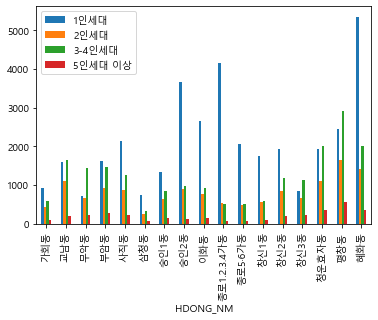

In [ ]:
sth_j[['1인세대','2인세대','3-4인세대',
       '5인세대 이상']].plot(kind = 'bar')

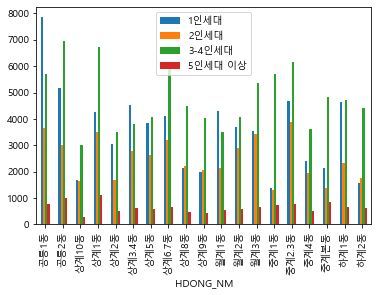

In [ ]:
sth_n[['1인세대','2인세대','3-4인세대',
       '5인세대 이상']].plot(kind = 'bar')

In [ ]:
sth [['1인세대','2인세대','3-4인세대','5인세대 이상']]

,1인세대,2인세대,3-4인세대,5인세대 이상
HDONG_NM,,,,
가회동,921.083333,435.416667,597.666667,109.750000
공릉1동,7850.916667,3656.166667,5697.833333,788.916667
공릉2동,5181.750000,3002.500000,6954.666667,1002.333333
교남동,1587.916667,1099.583333,1643.083333,214.833333
무악동,708.583333,657.500000,1434.000000,221.750000
부암동,1618.166667,938.250000,1463.916667,280.666667
사직동,2150.750000,878.500000,1259.250000,223.750000
삼청동,745.083333,249.750000,338.333333,80.166667
상계10동,1696.083333,1662.000000,3008.083333,293.833333


In [ ]:
from collections import Counter
import math

In [ ]:
sth.iloc[0,1:]

전체세대수      217695.416667
1인세대        66988.833333
2인세대        47458.916667
3-4인세대      90794.500000
5인세대 이상     12453.166667
Name: 노원구, dtype: float64

In [ ]:
sth.iloc[1,1:]

전체세대수      73725.916667
1인세대       35930.750000
2인세대       13877.250000
3-4인세대     20381.750000
5인세대 이상     3536.166667
Name: 종로구, dtype: float64

In [ ]:
sth.columns[1:]

Index(['전체세대수', '1인세대', '2인세대', '3-4인세대', '5인세대 이상'], dtype='object')

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 6 Text yticklabel objects>)

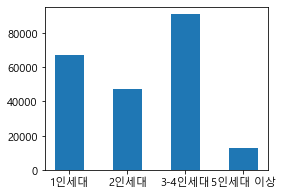

In [ ]:
plt.figure(figsize=(4,3))
plt.bar(sth.columns[2:],sth.iloc[0,2:],width = 0.5)
# plt.xlabel('code', fontsize = 14)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]), <a list of 9 Text yticklabel objects>)

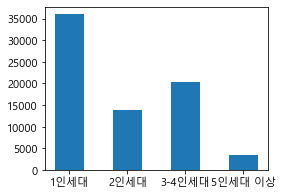

In [ ]:
plt.figure(figsize=(4,3))
plt.bar(sth.columns[2:],sth.iloc[1,2:],width = 0.5)
# plt.xlabel('code', fontsize = 14)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

In [ ]:
sth.iloc[1,1:]

전체세대수      73725.916667
1인세대       35930.750000
2-3인세대     24772.333333
4인세대 이상    13022.833333
Name: 종로구, dtype: float64

In [ ]:
len(hdt)

456

In [ ]:
hdt.describe()

,STD_YM,전체세대수,1인세대,2-3인세대,4인세대 이상
count,456.000000,456.000000,456.000000,456.000000,456.000000
mean,186695.750000,15337.964912,5416.820175,6168.982456,3752.162281
std,50261.243557,35186.425876,11538.518949,14739.688941,9237.427282
min,20181.000000,1400.000000,694.000000,428.000000,226.000000
25%,201805.750000,4485.750000,1696.500000,1463.500000,750.500000
50%,201808.500000,8489.500000,2436.500000,3355.000000,2308.500000
75%,201834.250000,11799.000000,4257.000000,4865.500000,3184.000000
max,201903.000000,217940.000000,68326.000000,92685.000000,59696.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f980fd1ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f98102f6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f980fdec88>,
 'medians': [<matplotlib.lines.Line2D at 0x1f98102fd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f98102fe48>,
 'means': []}

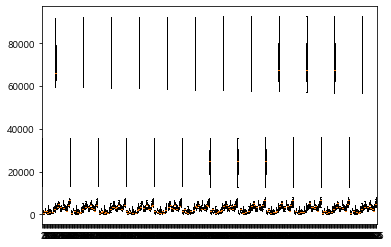

In [ ]:
plt.boxplot(hdt[['1인세대','2-3인세대','4인세대 이상']])

<BarContainer object of 240 artists>

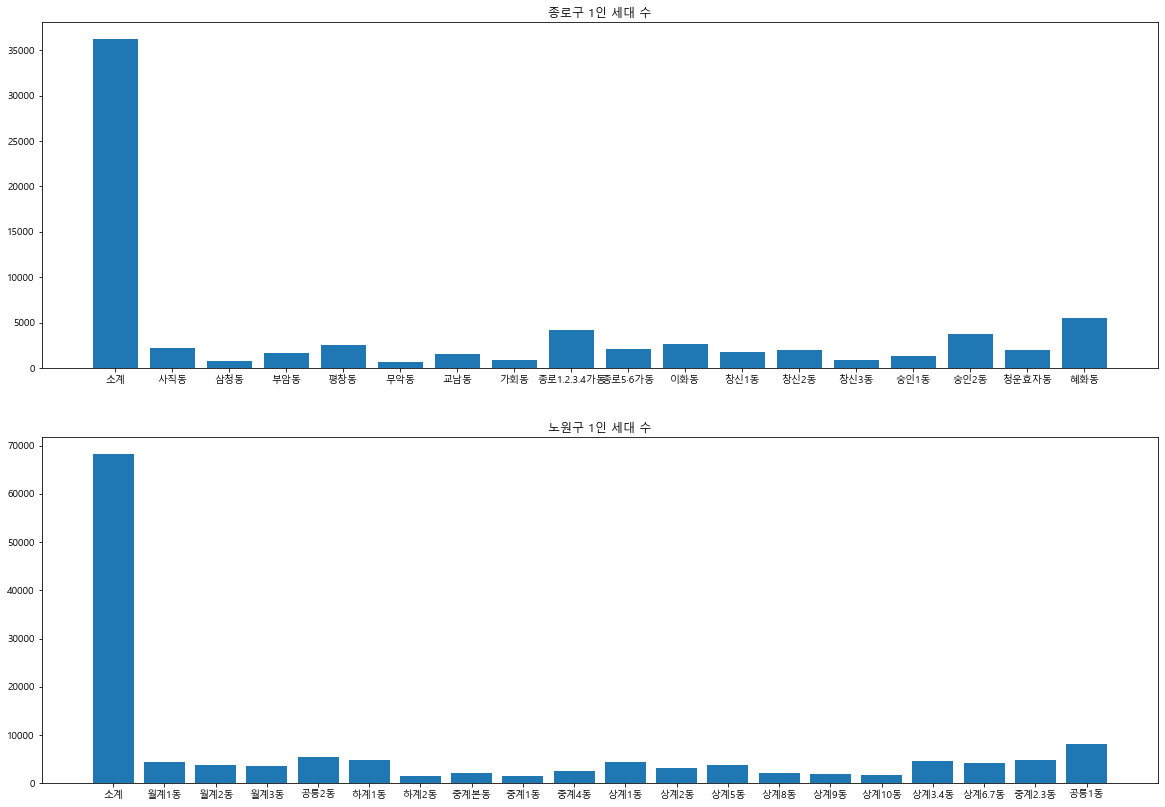

In [ ]:
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.set_title('종로구 1인 세대 수')
ax1.bar(hdt[hdt['SGNG_NM']=='종로구']['HDONG_NM'],hdt[hdt['SGNG_NM']=='종로구']['1인세대'])
ax2.set_title('노원구 1인 세대 수')
ax2.bar(hdt[hdt['SGNG_NM']!='종로구']['HDONG_NM'],hdt[hdt['SGNG_NM']!='종로구']['1인세대'])

In [ ]:
hdt[hdt['SGNG_NM']=='종로구']['HDONG_NM']

0               소계
1              사직동
2              삼청동
3              부암동
4              평창동
5              무악동
6              교남동
7              가회동
8      종로1.2.3.4가동
9          종로5·6가동
10             이화동
11            창신1동
12            창신2동
13            창신3동
14            숭인1동
15            숭인2동
16           청운효자동
17             혜화동
38              소계
39             사직동
40             삼청동
41             부암동
42             평창동
43             무악동
44             교남동
45             가회동
46     종로1.2.3.4가동
47         종로5·6가동
48             이화동
49            창신1동
          ...     
386            교남동
387            가회동
388    종로1.2.3.4가동
389        종로5·6가동
390            이화동
391           창신1동
392           창신2동
393           창신3동
394           숭인1동
395           숭인2동
396          청운효자동
397            혜화동
418             소계
419            사직동
420            삼청동
421            부암동
422            평창동
423            무악동
424            교남동
425            가회동
426    종로1.2.3.4가동
427        종

In [ ]:
hdg = hdt.groupby('HDONG_NM')
np.round(hdg.sum(),2)

,STD_YM,전체세대수,1인세대,2-3인세대,4인세대 이상
HDONG_NM,,,,,
가회동,186695.75,2063.92,921.08,767.00,375.83
공릉1동,186695.75,17993.83,7850.92,6679.25,3463.67
공릉2동,186695.75,16141.25,5181.75,6249.83,4709.67
교남동,186695.75,4545.42,1587.92,1971.33,986.17
무악동,186695.75,3021.83,708.58,1333.25,980.00
부암동,186695.75,4301.00,1618.17,1674.33,1008.50
사직동,186695.75,4512.25,2150.75,1565.25,796.25
삼청동,186695.75,1413.33,745.08,440.00,228.25
상계10동,186695.75,6660.00,1696.08,3260.83,1703.08


행정동 =hd.drop_duplicates(['행정동'],keep='first')
행정동 =list(행정동['행정동'])

### 유동인구 데이터 
- 시간대별 성연령대별 이전에 수정해놓은 것 불러오기


In [ ]:
#시간대별 데이터 불러오기
#성연령대별 + 미세먼지 데이터 불러오기 
os.chdir('C:/Users/Rangkku/Desktop/bigcon/people/')
poptm = pd.read_csv("poptime.csv",encoding="euc-kr")
popsd = pd.read_csv("dustpop.csv",encoding="euc-kr")

In [ ]:
poptm.columns

Index(['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23', 'SGNG_NM', 'ya', 'jeon',
       'sim', 'hu', 'jeo'],
      dtype='object')

In [ ]:
popsd.columns

Index(['SGNG_NM', 'HDONG_NM', 'STD_YM', 'STD_YMD', 'HDONG_CD',
       'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'MAN_FLOW',
       'WMAN_FLOW', 'ALL_FLOW', 'humi', 'noise', 'pm10', 

In [ ]:
poptm.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_20,TMST_21,TMST_22,TMST_23,SGNG_NM,ya,jeon,sim,hu,jeo
0,201804,20180401,1111051500,청운효자동,609.11,447.82,301.75,217.03,237.07,318.75,...,1331.83,1231.07,1041.82,624.62,종로구,4317.25,7121.24,8492.91,10440.09,6094.08
1,201804,20180402,1111051500,청운효자동,411.94,324.33,190.19,188.90,333.26,656.99,...,1870.18,1876.66,1554.58,931.94,종로구,6418.06,14743.58,8832.97,10764.49,9264.10
2,201804,20180403,1111051500,청운효자동,686.83,430.50,249.01,219.48,309.60,670.00,...,1789.69,1747.30,1662.30,1046.21,종로구,7160.93,15413.08,7946.75,11208.40,9067.09
3,201804,20180404,1111051500,청운효자동,537.44,402.90,264.37,237.26,345.32,605.26,...,1884.26,1770.76,1623.89,1055.82,종로구,6741.79,15058.68,8440.86,12670.89,9208.44
4,201804,20180405,1111051500,청운효자동,702.68,335.12,280.58,243.91,315.37,634.05,...,1664.56,1659.13,1573.93,905.64,종로구,6605.48,15818.64,7703.98,10163.99,8810.90


In [ ]:
hdpop=  pd.merge(poptm, hdt, on = ['STD_YM','HDONG_NM','SGNG_NM'],how = 'inner')
hdpop['HDONG_NM'] = hdpop['HDONG_NM'].apply(lambda x : x.replace(".",","))
## 세대수 데이터와 기존의 시간대별 유동인구 데이터와 결합

In [ ]:
pop_nm= popsd.drop_duplicates('HDONG_NM',keep ='first')
len(pop_nm['HDONG_NM'])

34

In [ ]:
hd_nm = hdpop.drop_duplicates('HDONG_NM',keep ='first')
hd_nm['HDONG_NM'] = hd_nm['HDONG_NM'].apply(lambda x : x.replace(".",","))
len(hd_nm['HDONG_NM'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


35

In [ ]:
print(len(hdpop))
hdpop.head()

11690


,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,SGNG_NM,ya,jeon,sim,hu,jeo,전체세대수,1인세대,2-3인세대,4인세대 이상
0,201804,20180401,1111051500,청운효자동,609.11,447.82,301.75,217.03,237.07,318.75,...,종로구,4317.25,7121.24,8492.91,10440.09,6094.08,5426,1942,2127,1357
1,201804,20180402,1111051500,청운효자동,411.94,324.33,190.19,188.90,333.26,656.99,...,종로구,6418.06,14743.58,8832.97,10764.49,9264.10,5426,1942,2127,1357
2,201804,20180403,1111051500,청운효자동,686.83,430.50,249.01,219.48,309.60,670.00,...,종로구,7160.93,15413.08,7946.75,11208.40,9067.09,5426,1942,2127,1357
3,201804,20180404,1111051500,청운효자동,537.44,402.90,264.37,237.26,345.32,605.26,...,종로구,6741.79,15058.68,8440.86,12670.89,9208.44,5426,1942,2127,1357
4,201804,20180405,1111051500,청운효자동,702.68,335.12,280.58,243.91,315.37,634.05,...,종로구,6605.48,15818.64,7703.98,10163.99,8810.90,5426,1942,2127,1357


In [ ]:
type(poptm.iloc[1,0])

numpy.int64

In [ ]:
print(len(popsd))
popsd.head()

12410


,SGNG_NM,HDONG_NM,STD_YM,STD_YMD,HDONG_CD,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,...,ALL_FLOW,humi,noise,pm10,pm25,temp,yoil,weekend,pm25_class,pm10_class
0,종로구,청운효자동,201804,20180401,1111051500,0.05,78.93,403.26,642.66,984.24,...,36473.42,63.535466,49.423505,66.506944,31.816667,15.884214,6.0,1.0,1.0,1.0
1,종로구,청운효자동,201804,20180402,1111051500,0.00,52.83,400.93,1342.24,1410.78,...,50027.58,62.172462,49.400556,65.076389,25.327778,18.500765,0.0,0.0,1.0,1.0
2,종로구,청운효자동,201804,20180403,1111051500,0.00,65.56,378.82,1288.09,1417.84,...,50799.07,66.033380,49.650209,70.552778,23.895139,18.371071,1.0,0.0,1.0,1.0
3,종로구,청운효자동,201804,20180404,1111051500,0.00,59.17,516.56,1429.78,1423.40,...,52124.65,63.433936,49.987483,19.015428,10.607994,13.575243,2.0,0.0,0.0,0.0
4,종로구,청운효자동,201804,20180405,1111051500,0.00,53.83,399.61,1243.01,1272.59,...,49108.90,80.383866,50.015299,9.228352,5.585196,8.193602,3.0,0.0,0.0,0.0


In [ ]:
pop_i = pd.merge(hdpop,popsd,on = ['STD_YM','HDONG_NM','SGNG_NM','STD_YMD','HDONG_CD'],how = 'inner')

In [ ]:
pop_i.columns

Index(['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23', 'SGNG_NM', 'ya', 'jeon',
       'sim', 'hu', 'jeo', '전체세대수', '1인세대', '2-3인세대', '4인세대 이상',
       'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT

In [ ]:
pop_i.to_csv("real_pop.csv",encoding="euc-kr",header=True,index = False)

### 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.cross_validation import train_test_split
import pydot

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
poptm1 = poptm[['STD_YM', 'STD_YMD', 'HDONG_NM','SGNG_NM', 'ya', 'jeon',
       'sim', 'hu', 'jeo']]

NameError: name 'poptm' is not defined

In [ ]:
popsd1 =  popsd[['SGNG_NM', 'HDONG_NM', 'STD_YM', 'STD_YMD','MAN_FLOW',
       'WMAN_FLOW', 'ALL_FLOW', 'humi', 'noise', 'pm10', 'pm25', 'temp',
       'yoil', 'weekend', 'pm25_class', 'pm10_class']]

In [ ]:
len(popsd1)

In [ ]:
import sys; print(sys.executable); import graphviz; print(graphviz.__path__) 

C:\Anaconda3\python.exe
['C:\\Anaconda3\\lib\\site-packages\\graphviz']


In [ ]:
# set PATH=%PATH%;C:\Program Files (x86)\Graphviz2.38\bin

In [ ]:
sd_dong = popsd1.drop_duplicates('HDONG_NM',keep='first')
sd_dong.HDONG_NM

0              청운효자동
365              사직동
730              부암동
1095             평창동
1460             이화동
1825            하계2동
2190            창신3동
2555            상계1동
2920             교남동
3285             가회동
3650     종로1,2,3,4가동
4015         종로5,6가동
4380             혜화동
4745            창신1동
5110            창신2동
5475            숭인1동
5840            숭인2동
6205            상계2동
6570           상계10동
6935            중계본동
7300            중계1동
7665            중계4동
8030          중계2,3동
8395            상계5동
8760            월계1동
9125            월계2동
9490            월계3동
9855            공릉1동
10220           하계1동
10585           공릉2동
10950         상계3,4동
11315         상계6,7동
11680           상계8동
12045           상계9동
Name: HDONG_NM, dtype: object

In [ ]:
for i in range(len(poptm1)):
    lb_t[lb_t.columns[i]] = lb_t[lb_t.columns[i]].apply(lambda x : x.replace(",","") 

In [ ]:
poptm1['HDONG_NM'] = poptm1['HDONG_NM'].apply(lambda x : x.replace(".",",") )

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tm_dong = poptm1.drop_duplicates(['HDONG_NM'],keep='first')
tm_dong.HDONG_NM

0              청운효자동
365              사직동
730              삼청동
1095             부암동
1460             평창동
1825             무악동
2190             교남동
2555             가회동
2920     종로1,2,3,4가동
3285         종로5,6가동
3650             이화동
4015             혜화동
4380            창신1동
4745            창신2동
5110            창신3동
5475            숭인1동
5840            숭인2동
6205            월계1동
6570            월계2동
6935            월계3동
7300            공릉1동
7665            공릉2동
8030            하계1동
8395            하계2동
8760            중계본동
9125            중계1동
9490            중계4동
9855          중계2,3동
10220           상계1동
10585           상계2동
10950         상계3,4동
11315           상계5동
11680         상계6,7동
12045           상계8동
12410           상계9동
12775          상계10동
Name: HDONG_NM, dtype: object

In [ ]:
data = pd.merge(popsd1,poptm1,on=['STD_YM', 'STD_YMD', 'HDONG_NM','SGNG_NM'],how= 'inner')
data.head()

,SGNG_NM,HDONG_NM,STD_YM,STD_YMD,MAN_FLOW,WMAN_FLOW,ALL_FLOW,humi,noise,pm10,...,temp,yoil,weekend,pm25_class,pm10_class,ya,jeon,sim,hu,jeo
0,종로구,청운효자동,201804,20180401,20859.44,15613.98,36473.42,63.535466,49.423505,66.506944,...,15.884214,6.0,1.0,1.0,1.0,4317.25,7121.24,8492.91,10440.09,6094.08
1,종로구,청운효자동,201804,20180402,30378.99,19648.59,50027.58,62.172462,49.400556,65.076389,...,18.500765,0.0,0.0,1.0,1.0,6418.06,14743.58,8832.97,10764.49,9264.10
2,종로구,청운효자동,201804,20180403,30451.25,20347.82,50799.07,66.033380,49.650209,70.552778,...,18.371071,1.0,0.0,1.0,1.0,7160.93,15413.08,7946.75,11208.40,9067.09
3,종로구,청운효자동,201804,20180404,30806.92,21317.73,52124.65,63.433936,49.987483,19.015428,...,13.575243,2.0,0.0,0.0,0.0,6741.79,15058.68,8440.86,12670.89,9208.44
4,종로구,청운효자동,201804,20180405,29520.52,19588.38,49108.90,80.383866,50.015299,9.228352,...,8.193602,3.0,0.0,0.0,0.0,6605.48,15818.64,7703.98,10163.99,8810.90


In [ ]:
data.columns

Index(['SGNG_NM', 'HDONG_NM', 'STD_YM', 'STD_YMD', 'MAN_FLOW', 'WMAN_FLOW',
       'ALL_FLOW', 'humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil', 'weekend',
       'pm25_class', 'pm10_class', 'ya', 'jeon', 'sim', 'hu', 'jeo'],
      dtype='object')

In [ ]:
!pip install pydot

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
data = pop_i
data.columns

Index(['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23', 'SGNG_NM', 'ya', 'jeon',
       'sim', 'hu', 'jeo', '전체세대수', '1인세대', '2-3인세대', '4인세대 이상',
       'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT

In [ ]:
data['전체세대수'] = data['전체세대수'].apply(lambda x : x.replace(",","") if type(x) == str else x )##,를 제거
data = data.dropna()

In [ ]:
y = data.ALL_FLOW
x = data[[ 'STD_YM', 'STD_YMD','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil', 'weekend','전체세대수','1인세대', '2-3인세대', '4인세대 이상']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
os.getcwd()

X_train.isnull().any()

STD_YM     False
STD_YMD    False
humi       False
noise      False
pm10       False
pm25       False
temp       False
yoil       False
weekend    False
전체세대수      False
1인세대       False
2-3인세대     False
4인세대 이상    False
dtype: bool

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeRegressor()
param_grid = {'criterion':['mse'], 'max_depth':[None,2,3,4,5,6]}
#param_grid = {'criterion':['mse','friedman_mse','mae'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3], max_features:[None,'sqrt','log2',3,4,5]}

grid = GridSearchCV(estimator, param_grid=param_grid) 
#grid = GridSearchCV(estimator, param_grid=param_grid, cv=3, scoring='r2') #디폴트로 cv=3, 회귀에서 디폴트로 scoring='r2'

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
df = pd.DataFrame(grid.cv_results_)
print(df)
#print(df.sort_values(by='param_max_depth'))
#print(df.sort_values(by='param_max_depth', ascending=0))
#print(df.sort_values(by='rank_test_score'))

#'''
estimator = grid.best_estimator_

###  의사결정나무 결과
- 의사결정나무의 하이퍼 파라미터를 찾아본 결과 max depth가 아예 없는 경우가 가장 mean test score 가 높게 나왔다.


In [ ]:
rm = DecisionTreeRegressor(max_depth = None)
model = rm.fit(X_train, y_train)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.983


- trainset 정확도는 1 testset정확도는 0.98로 나왔다.

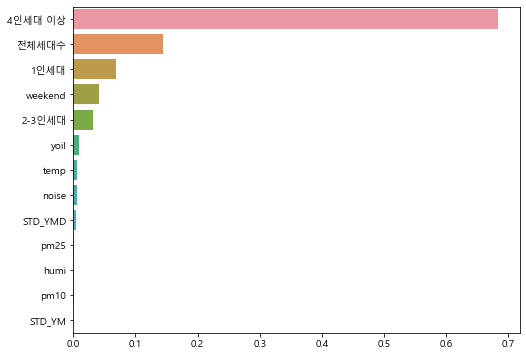

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)

plt.figure(figsize = (8,6))
sns.barplot(x=ftr_sort, y = ftr_sort.index)
plt.show()

-  유의미한 변수 또한 4인세대 이상이 압도적이었고 전체 세대수, 1인세대, 주말순으로 높았다.

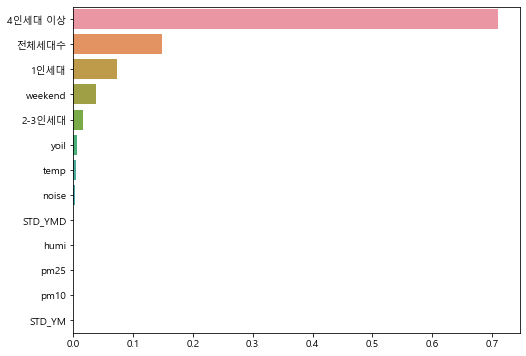

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)

plt.figure(figsize = (8,6))
sns.barplot(x=ftr_sort, y = ftr_sort.index)
plt.show()

### 유동인구 카드 데이터 병합파일 불러와서 의사결정나무 분석

In [ ]:
pc=pd.read_csv("pop_card_df.csv")## 유동인구와 카드 결합된 데이터 
pc.head()

,Unnamed: 0,time,gu,dong,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,AREA,LENGTH,X_COORD,Y_COORD,flow
0,0,2018-04-01,종로구,청운효자동,21,1,55,4,22,2573175.62,7975.05,126.972694,37.581306,1433.06
1,1,2018-04-01,종로구,청운효자동,21,0,20,35,184,2573175.62,7975.05,126.972694,37.581306,2109.14
2,2,2018-04-01,종로구,청운효자동,21,0,25,70,425,2573175.62,7975.05,126.972694,37.581306,1792.30
3,3,2018-04-01,종로구,청운효자동,21,0,30,18,82,2573175.62,7975.05,126.972694,37.581306,1936.10
4,4,2018-04-01,종로구,청운효자동,21,0,35,4,44,2573175.62,7975.05,126.972694,37.581306,2060.54


In [ ]:
pc['time'] = pc['time'].apply(lambda x : x.replace("-",""))## 전처리를 위해 날짜의 '-'를 제거
pc['dong'] = pc['dong'].apply(lambda x : x.replace(".",","))## 다음에 pi 데이터와 합치기 위해 .->,로 바꿈
pc['time'] = pc['time'].astype(int)

In [ ]:
pc.columns

Index(['Unnamed: 0', 'time', 'gu', 'dong', 'MCT_CAT_CD', 'SEX_CD', 'AGE_CD',
       'USE_CNT', 'USE_AMT', 'AREA', 'LENGTH', 'X_COORD', 'Y_COORD', 'flow'],
      dtype='object')

In [ ]:
data =pc[['time', 'SEX_CD', 'AGE_CD', 'USE_AMT','flow']]

In [ ]:
x = data[['time','SEX_CD', 'AGE_CD', 'USE_CNT','flow']]
y = data.USE_AMT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

훈련 세트 정확도: 0.494
테스트 세트 정확도: 0.440


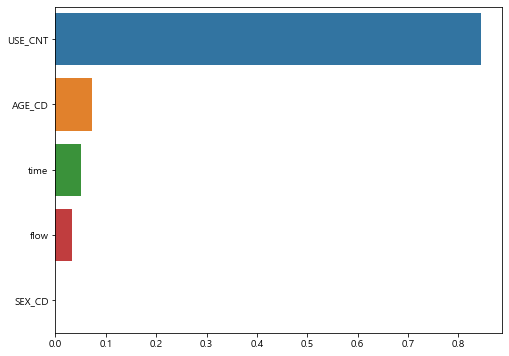

In [ ]:
ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)

plt.figure(figsize = (8,6))
sns.barplot(x=ftr_sort, y = ftr_sort.index)
plt.show()

In [ ]:
# y = data.ALL_FLOW
# x = data[[ 'STD_YM', 'STD_YMD','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil', 'weekend','전체세대수','1인세대', '2-3인세대', '4인세대 이상']]
# lb= lb.rename(columns={'합계': '사업체 수', '합계.1': '총 종사자 수','합계.2':'여성 종사자 수'})

## 유동+ 세대수+ 카드 데이터 의사결정나무


In [ ]:
pc = pc[['time', 'gu', 'dong', 'MCT_CAT_CD', 'SEX_CD', 'AGE_CD',
       'USE_CNT', 'USE_AMT', 'flow']]

In [ ]:
pop_i =pd.read_csv("real_pop.csv",encoding="euc-kr")

In [ ]:
pop_i.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,ALL_FLOW,humi,noise,pm10,pm25,temp,yoil,weekend,pm25_class,pm10_class
0,201804,20180401,1111051500,청운효자동,609.11,447.82,301.75,217.03,237.07,318.75,...,36473.42,63.535466,49.423505,66.506944,31.816667,15.884214,6.0,1.0,1.0,1.0
1,201804,20180402,1111051500,청운효자동,411.94,324.33,190.19,188.90,333.26,656.99,...,50027.58,62.172462,49.400556,65.076389,25.327778,18.500765,0.0,0.0,1.0,1.0
2,201804,20180403,1111051500,청운효자동,686.83,430.50,249.01,219.48,309.60,670.00,...,50799.07,66.033380,49.650209,70.552778,23.895139,18.371071,1.0,0.0,1.0,1.0
3,201804,20180404,1111051500,청운효자동,537.44,402.90,264.37,237.26,345.32,605.26,...,52124.65,63.433936,49.987483,19.015428,10.607994,13.575243,2.0,0.0,0.0,0.0
4,201804,20180405,1111051500,청운효자동,702.68,335.12,280.58,243.91,315.37,634.05,...,49108.90,80.383866,50.015299,9.228352,5.585196,8.193602,3.0,0.0,0.0,0.0


In [ ]:
pi = pop_i[[ 'STD_YM','HDONG_NM', 'STD_YMD','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil', 'weekend']]

In [ ]:
pi = pi.rename(columns = {'STD_YMD':'time','HDONG_NM':'dong'})

In [ ]:
# df_ts['HDONG_CD'] = df_ts['HDONG_CD'].astype(int)
# gis_df1['HDONG_CD'] = gis_df1['HDONG_CD'].astype(int)

In [ ]:
pi['time'] = pi['time'].astype(int)
pc['time'] = pc['time'].astype(int)

In [ ]:
data = pd.merge(pi,pc,on = ['time','dong'])

## 의사결정나무분석 미세먼지- 매출액 예측

In [ ]:
data.columns

Index(['STD_YM', 'dong', 'time', 'humi', 'noise', 'pm10', 'pm25', 'temp',
       'yoil', 'weekend', 'Unnamed: 0', 'gu', 'MCT_CAT_CD', 'SEX_CD', 'AGE_CD',
       'USE_CNT', 'USE_AMT', 'AREA', 'LENGTH', 'X_COORD', 'Y_COORD', 'flow'],
      dtype='object')

In [ ]:
data  = data.dropna()

In [ ]:
y = data.USE_AMT
x = data[[  'humi', 'noise', 'pm10', 'pm25', 'temp','AGE_CD']]

In [ ]:
x.isnull().any()

humi      False
noise     False
pm10      False
pm25      False
temp      False
AGE_CD    False
dtype: bool

In [ ]:
# from sklearn.model_selection import GridSearchCV

# estimator = DecisionTreeRegressor()
# param_grid = {'criterion':['mse'], 'max_depth':[None,2,3,4,5,6]}
# #param_grid = {'criterion':['mse','friedman_mse','mae'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3], max_features:[None,'sqrt','log2',3,4,5]}

# grid = GridSearchCV(estimator, param_grid=param_grid) 
# #grid = GridSearchCV(estimator, param_grid=param_grid, cv=3, scoring='r2') #디폴트로 cv=3, 회귀에서 디폴트로 scoring='r2'

# grid.fit(X_train, y_train)

# print(grid.best_score_)
# print(grid.best_params_)
# df = pd.DataFrame(grid.cv_results_)
# print(df)
# #print(df.sort_values(by='param_max_depth'))
# #print(df.sort_values(by='param_max_depth', ascending=0))
# #print(df.sort_values(by='rank_test_score'))

# #'''
# estimator = grid.best_estimator_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

훈련 세트 정확도: 0.012
테스트 세트 정확도: 0.016


In [ ]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
#     node [fontname = font_name, fontsize="11"]
#     image.savefig('tree.png')
    return Image(image)

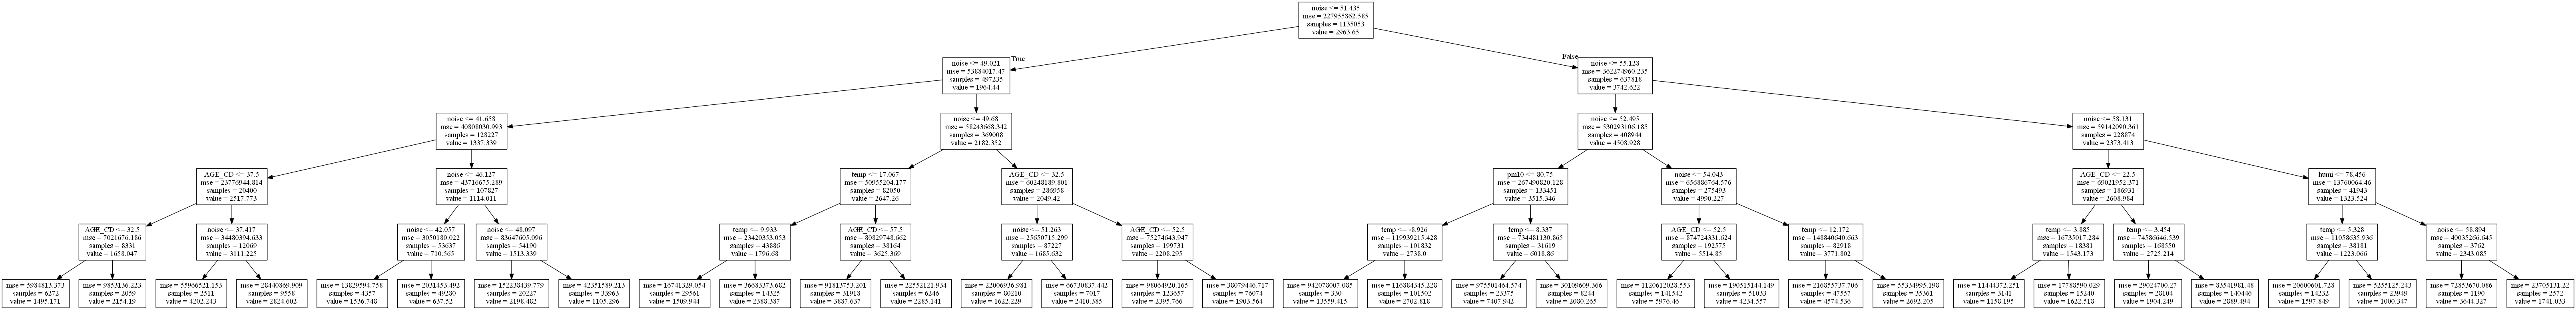

In [ ]:
feature_names = list(x.columns)
draw_decision_tree(model)

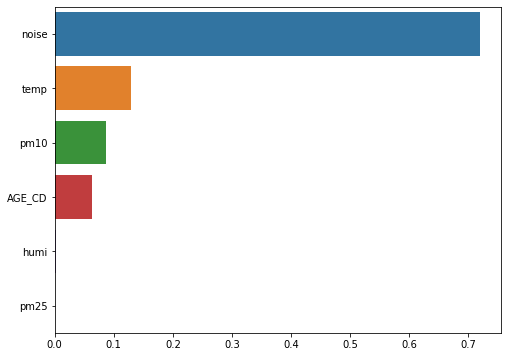

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)

plt.figure(figsize = (8,6))
sns.barplot(x=ftr_sort, y = ftr_sort.index)
plt.show()

In [ ]:
y = data.USE_AMT
x = data[[ 'time', 'humi', 'noise', 'pm10', 'pm25', 'temp',
       'yoil', 'weekend', '전체세대수', '1인세대', '2-3인세대', '4인세대 이상',
       'MCT_CAT_CD', 'SEX_CD', 'AGE_CD', 'USE_CNT',  'flow']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

훈련 세트 정확도: 0.491
테스트 세트 정확도: 0.605


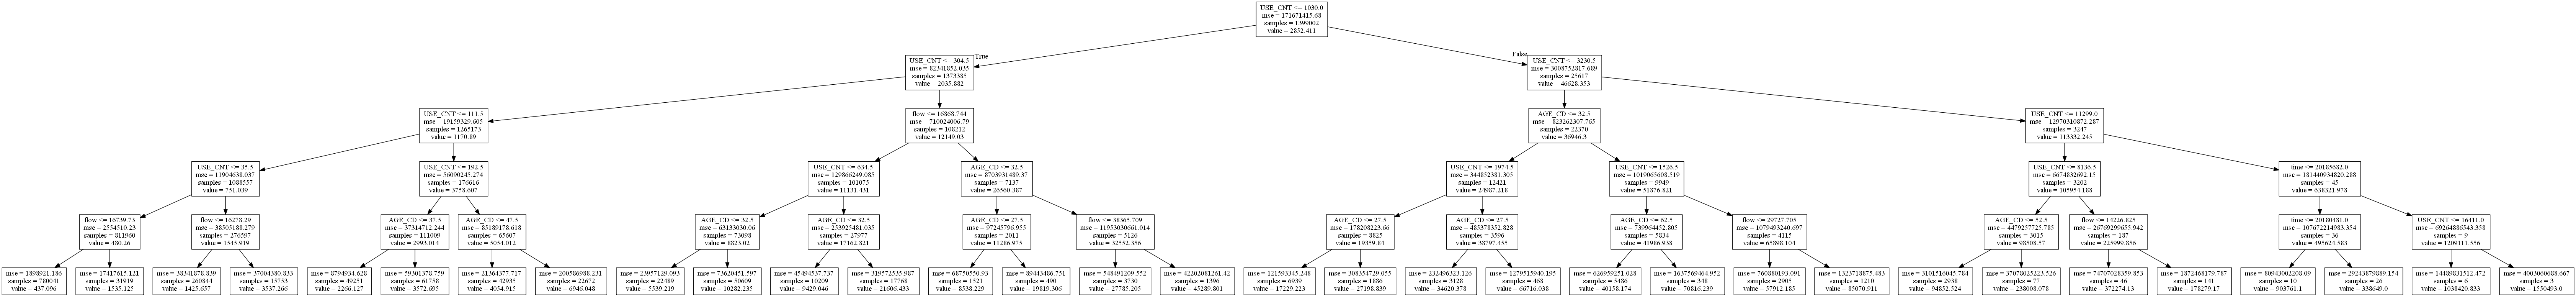

In [ ]:
feature_names = list(x.columns)
draw_decision_tree(model)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knr_prediction = model.predict(X_test)
result = np.sqrt(mean_squared_error(knr_prediction, y_test))
rmse.append(result)

### 의사결정 나무를 위한 그래프 생성 함수

In [ ]:
!pip install graphviz

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
#     node [fontname = font_name, fontsize="11"]
#     image.savefig('tree.png')
    return Image(image)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [ ]:
dot_buf = io.StringIO()
dot_buf

In [ ]:
feature_names = list(x.columns)
# dot_buf = 'pop.dot'

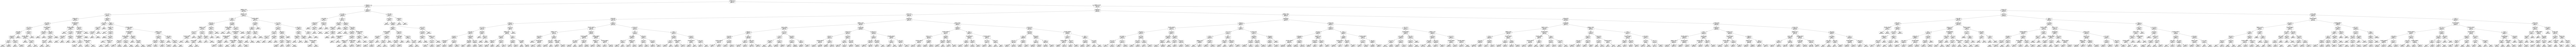

In [ ]:
draw_decision_tree(model)

In [ ]:
data.columns

Index(['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23', 'SGNG_NM', 'ya', 'jeon',
       'sim', 'hu', 'jeo', '전체세대수', '1인세대', '2-3인세대', '4인세대 이상',
       'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT

### 업종별 종사자수 데이터 불러와서 EDA

In [ ]:
labor=pd.read_csv("labor_all.csv",encoding="euc-kr")
labor.head()

,기간,자치구,동,사업체 수,총 종사자 수,여성 종사자 수,농업 임업 및 어업,농업 임업 및 어업 여성 종사자 수,광업,광업 여성 종사자 수,...,정보통신업 남성 종사자 수,금융 및 보험업 남성 종사자 수,부동산업 남성 종사자 수,전문 과학 및 기술 서비스업 남성 종사자 수,사업시설 관리 사업 지원 및 임대 서비스업 남성 종사자 수,공공행정 국방 및 사회보장 행정 남성 종사자 수,교육 서비스업 남성 종사자 수,보건업 및 사회복지 서비스업 남성 종사자 수,예술 스포츠 및 여가관련 서비스업 남성 종사자 수,협회 및 단체 수리 및 기타 개인 서비스업 남성 종사자 수
0,2017,종로구,소계,40490,268702,114602,30,10,10,2,...,12843,11148,4702,11876,8406,11526,5880,4167,3258,4553
1,2017,종로구,사직동,3544,52489,21460,16,4,0,0,...,1711,2960,749,4066,3238,5119,349,176,838,456
2,2017,종로구,삼청동,753,4507,2282,0,0,0,0,...,69,30,26,124,23,950,131,6,56,84
3,2017,종로구,부암동,567,4147,2010,0,0,5,1,...,74,16,29,47,9,49,711,24,27,579
4,2017,종로구,평창동,739,3547,1868,0,0,0,0,...,56,34,87,151,15,48,284,70,93,142


In [ ]:
labor.columns

Index(['동', '사업체 수', '총 종사자 수', '여성 종사자 수', '농업 임업 및 어업',
       '농업 임업 및 어업 여성 종사자 수', '광업', '광업 여성 종사자 수', '제조업', '제조업 여성 종사자 수',
       '전기 가스 증기 및 공기조절 공급업', '전기 가스 증기 및 공기조절 공급업 여성 종사자 수',
       '수도 하수 및 폐기물 처리 원료 재생업', '수도 하수 및 폐기물 처리 원료 재생업 여성 종사자 수', '건설업',
       '건설업 여성 종사자 수', '도매 및 소매업', '도매 및 소매업 여성 종사자 수', '운수 및 창고업',
       '운수 및 창고업 여성 종사자 수', '숙박 및 음식점업', '숙박 및 음식점업 여성 종사자 수', '정보통신업',
       '정보통신업 여성 종사자 수', '금융 및 보험업', '금융 및 보험업 여성 종사자 수', '부동산업',
       '부동산업 여성 종사자 수', '전문 과학 및 기술 서비스업', '전문 과학 및 기술 서비스업 여성 종사자 수',
       '사업시설 관리 사업 지원 및 임대 서비스업', '사업시설 관리 사업 지원 및 임대 서비스업 여성 종사자 수',
       '공공행정 국방 및 사회보장 행정', '공공행정 국방 및 사회보장 행정 여성 종사자 수', '교육 서비스업',
       '교육 서비스업 여성 종사자 수', '보건업 및 사회복지 서비스업', '보건업 및 사회복지 서비스업 여성 종사자 수',
       '예술 스포츠 및 여가관련 서비스업', '예술 스포츠 및 여가관련 서비스업 여성 종사자 수',
       '협회 및 단체 수리 및 기타 개인 서비스업', '협회 및 단체 수리 및 기타 개인 서비스업 여성 종사자 수',
       '농업 임업 및 어업 남성 종사자 수', '광업 남성 종사자 수', '제조업 남성 종사자 수',
       '전기 가스 증기 및 공기조절 공급업 남성 종사자 수', '수도 하수 및 폐기물 

In [ ]:
lb= lb.rename(columns={'합계': '사업체 수', '합계.1': '총 종사자 수','합계.2':'여성 종사자 수'})

In [ ]:
labor.rename(columns={'동':'HDONG_NM'})

,HDONG_NM,사업체 수,총 종사자 수,여성 종사자 수,농업 임업 및 어업,농업 임업 및 어업 여성 종사자 수,광업,광업 여성 종사자 수,제조업,제조업 여성 종사자 수,...,정보통신업 남성 종사자 수,금융 및 보험업 남성 종사자 수,부동산업 남성 종사자 수,전문 과학 및 기술 서비스업 남성 종사자 수,사업시설 관리 사업 지원 및 임대 서비스업 남성 종사자 수,공공행정 국방 및 사회보장 행정 남성 종사자 수,교육 서비스업 남성 종사자 수,보건업 및 사회복지 서비스업 남성 종사자 수,예술 스포츠 및 여가관련 서비스업 남성 종사자 수,협회 및 단체 수리 및 기타 개인 서비스업 남성 종사자 수
0,소계,40490,268702,114602,30,10,10,2,13078,5562,...,12843,11148,4702,11876,8406,11526,5880,4167,3258,4553
1,사직동,3544,52489,21460,16,4,0,0,217,86,...,1711,2960,749,4066,3238,5119,349,176,838,456
2,삼청동,753,4507,2282,0,0,0,0,82,28,...,69,30,26,124,23,950,131,6,56,84
3,부암동,567,4147,2010,0,0,5,1,122,59,...,74,16,29,47,9,49,711,24,27,579
4,평창동,739,3547,1868,0,0,0,0,101,49,...,56,34,87,151,15,48,284,70,93,142
5,무악동,531,1457,728,0,0,0,0,11,4,...,0,8,58,3,7,5,48,91,10,49
6,교남동,347,3816,2263,0,0,0,0,15,7,...,24,12,26,176,12,24,96,768,19,91
7,가회동,747,13681,3456,0,0,0,0,287,187,...,643,38,33,992,79,205,297,47,87,98
8,종로1.2.3.4가동,15851,111270,44381,0,0,5,1,5316,1762,...,8379,6866,2626,4513,3826,3440,991,449,719,1770
9,종로5·6가동,7613,23581,9090,1,0,0,0,2696,1201,...,891,672,466,373,816,179,156,153,73,396


In [ ]:
dong_NM  =  data.drop_duplicates(['HDONG_NM'],keep='first')

In [ ]:
dong_NM.HDONG_NM

0              청운효자동
334              사직동
668              부암동
1002             평창동
1336             교남동
1670             가회동
2004     종로1,2,3,4가동
2338             이화동
2672             혜화동
3006            창신1동
3340            창신2동
3674            창신3동
4008            숭인1동
4342            숭인2동
4676            월계1동
5010            월계2동
5344            월계3동
5678            공릉1동
6012            공릉2동
6346            하계1동
6680            하계2동
7014            중계본동
7348            중계1동
7682            중계4동
8016          중계2,3동
8350            상계1동
8684            상계2동
9018          상계3,4동
9352            상계5동
9686          상계6,7동
10020           상계8동
10354           상계9동
10688          상계10동
Name: HDONG_NM, dtype: object

In [ ]:
# for i in range(len(lb_t.columns)):
#     if i > 2: 
#         lb_t[lb_t.columns[i]] = lb_t[lb_t.columns[i]].apply(lambda x : x.replace(",","") if type(x) == str else x )##,를 제거
#         lb_t[lb_t.columns[i]] = lb_t[lb_t.columns[i]].apply(lambda x : int(float(x)) )## int형으로 만듬

In [ ]:
pop_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
pop_tree.fit(X_train, y_train)

In [ ]:
# 데이터 표준화 작업
# sc = StandardScaler()
# sc.fit(X_train)

In [ ]:
df_dust = pd.read_csv("finedust_day.csv")
df_dust = df_dust.rename(columns = {'Unnamed: 0': 'STD_YMD'})
df_dust.head()

In [ ]:
df_dust.isnull().any()## 어떻게 처리할지 고민해보기

In [ ]:
from sklearn import tree

In [ ]:
pop_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
pop_tree.fit(X_train, y_train)

In [ ]:
dong = pd.get_dummies(data['HDONG_NM'])

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [ ]:
!pip install pydotplus

### 미세먼지 편의점 데이터 동별로 확인

![image.png](attachment:image.png)

In [ ]:
gs_df = pd.read_csv("gs.csv")
gs_df.columns

Index(['Unnamed: 0', 'time', 'gu', 'dong', 'sales_index', '10_rate', '20_rate',
       '30_rate', '40_rate', '50_rate', '60_rate', '70_rate', '80_rate',
       '10_index', '20_index', '30_index', '40_index', '50_index', '60_index',
       '70_index', '80_index'],
      dtype='object')

In [ ]:
gs1 = gs_df.copy()

In [ ]:
gs1 = gs1.rename(columns={'10_rate':'food_rate', '20_rate':'snack_rate',
       '30_rate':'drink_rate', '40_rate':'homeliving_rate', '50_rate':'health_rate', '60_rate':'hobby_rate', '70_rate':'social_rate', '80_rate':'baby_rate'})
gs1 = gs1.rename(columns={'10_index':'food_index', '20_index':'snack_index','30_index':'drink_index', '40_index':'homeliving_index', '50_index':'health_index', '60_index':'hobby_index', '70_index':'social_index', '80_index':'baby_index'})

In [ ]:
gs1.columns

Index(['Unnamed: 0', 'time', 'gu', 'dong', 'sales_index', 'food_rate',
       'snack_rate', 'drink_rate', 'homeliving_rate', 'health_rate',
       'hobby_rate', 'social_rate', 'baby_rate', 'food_index', 'snack_index',
       'drink_index', 'homeliving_index', 'health_index', 'hobby_index',
       'social_index', 'baby_index'],
      dtype='object')

In [ ]:
gs1 = gs1[['time', 'gu', 'dong', 'sales_index', 'food_rate',
       'snack_rate', 'drink_rate', 'homeliving_rate', 'health_rate',
       'hobby_rate', 'social_rate', 'baby_rate', 'food_index', 'snack_index',
       'drink_index', 'homeliving_index', 'health_index', 'hobby_index',
       'social_index', 'baby_index']]

In [ ]:
gs1 = gs1.rename(columns={"time":'tm'})

In [ ]:
gs1.head()

,tm,gu,dong,sales_index,food_rate,snack_rate,drink_rate,homeliving_rate,health_rate,hobby_rate,social_rate,baby_rate,food_index,snack_index,drink_index,homeliving_index,health_index,hobby_index,social_index,baby_index
0,2018-04-01,종로구,청운효자동,73.7,27.9,30.0,33.5,1.6,5.4,0.0,1.3,0.4,20.5623,22.1100,24.6895,1.1792,3.9798,0.0000,0.9581,0.2948
1,2018-04-01,종로구,사직동,125.8,23.7,25.8,35.0,4.6,9.3,0.5,0.2,0.9,29.8146,32.4564,44.0300,5.7868,11.6994,0.6290,0.2516,1.1322
2,2018-04-01,종로구,삼청동,67.4,25.4,24.7,32.4,6.5,9.0,0.0,1.3,0.7,17.1196,16.6478,21.8376,4.3810,6.0660,0.0000,0.8762,0.4718
3,2018-04-01,종로구,부암동,101.1,41.6,21.8,28.3,2.7,3.7,0.6,1.2,0.2,42.0576,22.0398,28.6113,2.7297,3.7407,0.6066,1.2132,0.2022
4,2018-04-01,종로구,평창동,101.3,31.1,26.7,26.2,1.5,13.5,0.0,0.7,0.2,31.5043,27.0471,26.5406,1.5195,13.6755,0.0000,0.7091,0.2026


In [ ]:
gs1['dong'] = gs1['dong'].apply(lambda x : x.replace(".",","))

In [ ]:
fine_dust = pd.read_csv("finedust_day1.csv",encoding = 'euc-kr')

In [ ]:
dust = fine_dust.iloc[:,1:]

In [ ]:
dust.head()

,tm,dong,gu,humi,noise,pm10,pm25,temp,yoil,weekend,pm25_class,pm10_class
0,2018-04-01,"종로1,2,3,4가동",0.0,60.608096,51.902082,64.661343,32.314771,16.673609,6,1,1.0,1.0
1,2018-04-02,"종로1,2,3,4가동",0.0,58.215569,52.864267,62.813180,25.431785,19.595667,0,0,1.0,1.0
2,2018-04-03,"종로1,2,3,4가동",0.0,62.772418,53.245262,61.514120,18.093374,19.300746,1,0,1.0,1.0
3,2018-04-04,"종로1,2,3,4가동",0.0,61.197928,53.658183,18.272517,9.823658,14.236297,2,0,0.0,0.0
4,2018-04-05,"종로1,2,3,4가동",0.0,78.124086,53.899402,11.503668,7.597715,8.836613,3,0,0.0,0.0


In [ ]:
# for i in range(len(dust)):
#     if dust['gu'][i]==0 :
#         dust['gu'][i] = '종로구'
#     else : dust['gu'][i] = '노원구'

In [ ]:
dust[['dong','gu']].head()

,dong,gu
0,"종로1,2,3,4가동",0.0
1,"종로1,2,3,4가동",0.0
2,"종로1,2,3,4가동",0.0
3,"종로1,2,3,4가동",0.0
4,"종로1,2,3,4가동",0.0


In [ ]:
dust.columns

Index(['tm', 'dong', 'gu', 'humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class'],
      dtype='object')

In [ ]:
dust = dust[['tm', 'dong', 'humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class']]

In [ ]:
dust.isnull().any()

tm            False
dong          False
humi           True
noise          True
pm10           True
pm25           True
temp           True
yoil          False
weekend       False
pm25_class     True
pm10_class     True
dtype: bool

In [ ]:
len(gs1)

13125

In [ ]:
len(dust)

13140

In [ ]:
gsdust = pd.merge(gs1,dust,on = ['tm','dong'],how = 'left')

In [ ]:
gsdust['dong'].drop_duplicates(keep='first')

0           청운효자동
1             사직동
2             삼청동
3             부암동
4             평창동
5             무악동
6             교남동
7             가회동
8     종로1,2,3,4가동
9         종로5,6가동
10            이화동
11            혜화동
12           창신1동
13           창신2동
14           창신3동
15           숭인1동
16           숭인2동
17           월계1동
18           월계2동
19           월계3동
20           공릉1동
21           공릉2동
22           하계1동
23           하계2동
24           중계본동
25           중계1동
26           중계4동
27         중계2,3동
28           상계1동
29           상계2동
30         상계3,4동
31           상계5동
32         상계6,7동
33           상계8동
34           상계9동
35          상계10동
Name: dong, dtype: object

In [ ]:
gsdust.to_csv("gs_dust.csv",encoding='euc-kr')

## 미세먼지에 민감한 행정동만  gs데이터 합쳐서 확인 
하계2동 상계 1동 교남동 
가회동 종로5,6가동 
중계2,3동 월계 3동 공릉 1동 
공릉2동 하계1동 상계8동

In [ ]:
gsdust = gsdust[(gsdust['dong']=='하계2동')|(gsdust['dong']=='상계1동')|(gsdust['dong']=='교남동')|(gsdust['dong']=='가회동')|(gsdust['dong']=='종로5,6가동')|(gsdust['dong']=='중계2,3동')|(gsdust['dong']=='월계3동')|(gsdust['dong']=='공릉1동')|(gsdust['dong']=='공릉2동')|(gsdust['dong']=='하계1동')|(gsdust['dong']=='상계8동')]

## 미세먼지 민감도 지수 생성
-  데이터 병합 
- pm10 class pm25 class 가지고 미세먼지 민감도 지수 생성

In [ ]:
tsg = pd.read_csv('df_tsg.csv',encoding='euc-kr')
tsg.columns

Index(['HDONG_CD', 'HDONG_NM', 'SIDO_CD', 'SIDO_NM', 'SGNG_CD', 'SGNG_NM',
       'AREA', 'LENGTH', 'X_COORD', 'Y_COORD', 'STD_YM', 'STD_YMD',
       'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP

In [ ]:
tsg = tsg[['HDONG_NM', 'SGNG_NM',
       'AREA', 'LENGTH', 'X_COORD', 'Y_COORD', 'STD_YMD',
       'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

In [ ]:
tsg['all_flow']=tsg['TMST_00']+tsg['TMST_01']+tsg['TMST_02']+tsg['TMST_03']+tsg['TMST_04']+tsg['TMST_05']+tsg['TMST_06']+tsg['TMST_07']+tsg['TMST_08']+tsg['TMST_09']+tsg['TMST_10']+tsg['TMST_11']+tsg['TMST_12']+tsg['TMST_13']+tsg['TMST_14']+tsg['TMST_15']+tsg['TMST_16']+tsg['TMST_17']+tsg['TMST_18']+tsg['TMST_19']+tsg['TMST_20']+tsg['TMST_21']+tsg['TMST_23']+tsg['TMST_22']

In [ ]:
tsg.head()

,HDONG_NM,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,STD_YMD,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,...,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,all_flow
0,청운효자동,종로구,2573175.62,7975.05,126.972694,37.581306,20180401,0.05,78.93,403.26,...,2550.96,2464.35,2327.44,1933.71,1597.47,1331.83,1231.07,1041.82,624.62,36465.57
1,청운효자동,종로구,2573175.62,7975.05,126.972694,37.581306,20180402,0.00,52.83,400.93,...,2486.51,3069.69,2811.90,3227.87,2289.39,1870.18,1876.66,1554.58,931.94,50023.20
2,청운효자동,종로구,2573175.62,7975.05,126.972694,37.581306,20180403,0.00,65.56,378.82,...,2695.69,2795.18,3005.22,3312.42,2217.68,1789.69,1747.30,1662.30,1046.21,50796.25
3,청운효자동,종로구,2573175.62,7975.05,126.972694,37.581306,20180404,0.00,59.17,516.56,...,3210.53,3237.70,3251.28,3297.45,2255.97,1884.26,1770.76,1623.89,1055.82,52120.66
4,청운효자동,종로구,2573175.62,7975.05,126.972694,37.581306,20180405,0.00,53.83,399.61,...,2362.98,2634.87,2691.47,3241.41,2245.80,1664.56,1659.13,1573.93,905.64,49102.99


In [ ]:
tsg = tsg.rename(columns={'HDONG_NM' :'dong','SGNG_NM':'gu','STD_YMD':'tm'})

In [ ]:
tsg.head()

,dong,gu,AREA,LENGTH,X_COORD,Y_COORD,tm,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,...,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,all_flow
0,청운효자동,종로구,2573175.62,7975.05,126.972694,37.581306,20180401,0.05,78.93,403.26,...,2550.96,2464.35,2327.44,1933.71,1597.47,1331.83,1231.07,1041.82,624.62,36465.57
1,청운효자동,종로구,2573175.62,7975.05,126.972694,37.581306,20180402,0.00,52.83,400.93,...,2486.51,3069.69,2811.90,3227.87,2289.39,1870.18,1876.66,1554.58,931.94,50023.20
2,청운효자동,종로구,2573175.62,7975.05,126.972694,37.581306,20180403,0.00,65.56,378.82,...,2695.69,2795.18,3005.22,3312.42,2217.68,1789.69,1747.30,1662.30,1046.21,50796.25
3,청운효자동,종로구,2573175.62,7975.05,126.972694,37.581306,20180404,0.00,59.17,516.56,...,3210.53,3237.70,3251.28,3297.45,2255.97,1884.26,1770.76,1623.89,1055.82,52120.66
4,청운효자동,종로구,2573175.62,7975.05,126.972694,37.581306,20180405,0.00,53.83,399.61,...,2362.98,2634.87,2691.47,3241.41,2245.80,1664.56,1659.13,1573.93,905.64,49102.99


In [ ]:
tsg['tm']=tsg['tm'].astype(int)

In [ ]:
tsg['dong'] = tsg['dong'].apply(lambda x: x.replace(".",","))

In [ ]:
gsdust = pd.read_csv("gs_dust.csv",encoding='euc-kr')

In [ ]:
gsdust['tm'] = gsdust['tm'].apply(lambda x: x.replace("-",""))

gsdust['tm'] = gsdust['tm'].astype(int)

In [ ]:
gsppds = pd.merge(gsdust,tsg,on= ['dong','gu','tm'],how='inner')## gs people dust join

In [ ]:
gsppds.head()

,Unnamed: 0,tm,gu,dong,sales_index,food_rate,snack_rate,drink_rate,homeliving_rate,health_rate,...,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,all_flow
0,0,20180401,종로구,청운효자동,73.7,27.9,30.0,33.5,1.6,5.4,...,2550.96,2464.35,2327.44,1933.71,1597.47,1331.83,1231.07,1041.82,624.62,36465.57
1,1,20180401,종로구,사직동,125.8,23.7,25.8,35.0,4.6,9.3,...,9179.66,8899.18,8318.59,7009.69,5750.79,5137.36,4532.06,3589.93,2308.88,130965.88
2,2,20180401,종로구,삼청동,67.4,25.4,24.7,32.4,6.5,9.0,...,2126.52,1998.35,1794.76,1281.02,1059.50,875.79,691.84,433.89,229.83,25302.26
3,3,20180401,종로구,부암동,101.1,41.6,21.8,28.3,2.7,3.7,...,4888.78,5111.07,5067.47,4148.24,3502.62,3217.30,2925.42,2374.94,1382.12,69731.76
4,4,20180401,종로구,평창동,101.3,31.1,26.7,26.2,1.5,13.5,...,9539.91,8973.38,7940.15,6992.54,6460.50,5661.25,5210.50,4416.75,3060.66,138450.82


In [ ]:
gsppds.columns

Index(['Unnamed: 0', 'tm', 'gu', 'dong', 'sales_index', 'food_rate',
       'snack_rate', 'drink_rate', 'homeliving_rate', 'health_rate',
       'hobby_rate', 'social_rate', 'baby_rate', 'food_index', 'snack_index',
       'drink_index', 'homeliving_index', 'health_index', 'hobby_index',
       'social_index', 'baby_index', 'humi', 'noise', 'pm10', 'pm25', 'temp',
       'yoil', 'weekend', 'pm25_class', 'pm10_class', 'AREA', 'LENGTH',
       'X_COORD', 'Y_COORD', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CN

In [ ]:
data = gsppds[['pm10', 'pm25','pm25_class', 'pm10_class','dong','all_flow']]

In [ ]:
data['pm25_c'] = data['pm25'].apply(lambda x : 1 if x >= 35 else 0)
data['pm10_c'] = data['pm10'].apply(lambda x : 1 if x >= 80 else 0)                                                       

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
mom = 0  
chd = 0

In [ ]:
for i in range(len(data)):
    if data['pm25_c'][i]==1: 
        mom = mom+ data['all_flow'][i]
    else : 
        chd += data['all_flow'][i]
        
pm25_jisu = (chd/mom)


In [ ]:
mom = 0  
chd = 0

In [ ]:
for i in range(len(data)):
    if data['pm10_c'][i]==1: 
        mom = mom+ data['all_flow'][i]
    else : 
        chd += data['all_flow'][i]
        
pm10_jisu = (chd/mom)

In [ ]:
pm10_jisu 

4.612861875770998

In [ ]:
pm25_jisu

2.3220388976132824

In [ ]:
cr25 = pm25_jisu
cr10 = pm10_jisu 

In [ ]:
df1 = data[data['dong']==dong_list[1]][['pm10_c','all_flow']]
df1 = df1.reset_index()
df2 = data[data['dong']==dong_list[1]][['pm25_c','all_flow']]
df2 = df1.reset_index()

In [ ]:
df1['all_flow']

0      130965.88
1      228495.14
2      235729.52
3      242989.54
4      236219.58
5      232094.19
6      179562.25
7      129432.47
8      225987.21
9      241527.81
10     238391.22
11     249065.51
12     243616.15
13     167004.31
14     143547.99
15     233092.04
16     247182.53
17     246143.76
18     251685.70
19     252559.07
20     186126.15
21     124406.36
22     212854.20
23     242138.33
24     251663.00
25     251096.15
26     261816.06
27     187831.85
28     146688.12
29     230033.99
         ...    
335    146407.07
336    117007.98
337    207878.36
338    211247.40
339    209506.79
340    218891.64
341    219652.88
342    170240.20
343    122943.08
344    208563.80
345    213114.01
346    218380.90
347    220672.78
348    220273.05
349    171736.00
350    143948.88
351    210465.72
352    214660.95
353    214036.77
354    213017.71
355    214713.49
356    165660.99
357    132127.19
358    210613.25
359    216633.81
360    216208.63
361    216845.19
362    217494.

In [ ]:
data

,pm10,pm25,pm25_class,pm10_class,dong,all_flow,pm25_c,pm10_c
0,66.506944,31.816667,1.0,1.0,청운효자동,36465.57,0,0
1,68.306944,32.397222,1.0,1.0,사직동,130965.88,0,0
2,68.638426,32.795602,1.0,1.0,삼청동,25302.26,0,0
3,54.810417,25.114583,1.0,1.0,부암동,69731.76,0,0
4,76.796528,36.596528,2.0,1.0,평창동,138450.82,1,0
5,66.596528,31.538194,1.0,1.0,무악동,18184.60,0,0
6,67.022137,31.780366,1.0,1.0,교남동,28356.16,0,0
7,66.773843,31.810417,1.0,1.0,가회동,17508.39,0,0
8,64.661343,32.314771,1.0,1.0,"종로1,2,3,4가동",354619.07,0,0
9,60.955556,29.038194,1.0,1.0,"종로5,6가동",99030.63,0,0


In [ ]:
def dust_sen(df1,df2,cr25,cr10):
    ####미세먼지 민감도 25
        mom1 = 0; chd1 = 0;
        for i in range(len(df1)):
            if df1['pm25_c'][i]==1: 
                mom1 = mom1+ df1['all_flow'][i]
            else : 
                chd1 += df1['all_flow'][i]
        rst25 = (chd1/mom1)
        print("미세먼지 pm25 민감도 :",rst25)
        if rst25 > cr25 :print("pm25 미세먼지 민감") 
        else :print("pm25 미세먼지 덜 민감") 
        ####미세먼지 민감도 10
        mom2 = 0; chd2 = 0;
        for i in range(len(df2)):
            if df2['pm10_c'][i]==1: 
                mom2 = mom2+ df2['all_flow'][i]
            else : 
                chd2 += df2['all_flow'][i]
        rst10 = (chd2/mom2)
        print("미세먼지 pm10 민감도 :",rst10)
        if rst10 > cr10 :print("pm10 미세먼지 민감") 
        else :print("pm10 미세먼지 덜 민감") 

In [ ]:
dong_list = data['dong'].drop_duplicates(keep='first')

In [ ]:
dong_list

0           청운효자동
1             사직동
2             삼청동
3             부암동
4             평창동
5             무악동
6             교남동
7             가회동
8     종로1,2,3,4가동
9         종로5,6가동
10            이화동
11            혜화동
12           창신1동
13           창신2동
14           창신3동
15           숭인1동
16           숭인2동
17           월계1동
18           월계2동
19           월계3동
20           공릉1동
21           공릉2동
22           하계1동
23           하계2동
24           중계본동
25           중계1동
26           중계4동
27         중계2,3동
28           상계1동
29           상계2동
30         상계3,4동
31           상계5동
32         상계6,7동
33           상계8동
34           상계9동
35          상계10동
Name: dong, dtype: object

In [ ]:
print(cr10,cr25)

4.612861875770998 2.3220388976132824


In [ ]:
data.head()

,pm10,pm25,pm25_class,pm10_class,dong,all_flow,pm25_c,pm10_c
0,66.506944,31.816667,1.0,1.0,청운효자동,36465.57,0,0
1,68.306944,32.397222,1.0,1.0,사직동,130965.88,0,0
2,68.638426,32.795602,1.0,1.0,삼청동,25302.26,0,0
3,54.810417,25.114583,1.0,1.0,부암동,69731.76,0,0
4,76.796528,36.596528,2.0,1.0,평창동,138450.82,1,0


In [ ]:
for i in range(len(dong_list)):
            df1 = data[data['dong']==dong_list[i]][['pm25_c','all_flow']]
            df1 = df1.reset_index()
            df2 = data[data['dong']==dong_list[i]][['pm10_c','all_flow']]
            df2 = df2.reset_index()
            print("행정동명 :",dong_list[i])
            dust_sen(df1,df2,cr25,cr10)

행정동명 : 청운효자동
미세먼지 pm25 민감도 : 2.633792542193414
pm25 미세먼지 민감
미세먼지 pm10 민감도 : 4.203165929330775
pm10 미세먼지 덜 민감
행정동명 : 사직동
미세먼지 pm25 민감도 : 1.9605954270612937
pm25 미세먼지 덜 민감
미세먼지 pm10 민감도 : 4.319039070937273
pm10 미세먼지 덜 민감
행정동명 : 삼청동
미세먼지 pm25 민감도 : 2.4373272106025583
pm25 미세먼지 민감
미세먼지 pm10 민감도 : 4.584694616173883
pm10 미세먼지 덜 민감
행정동명 : 부암동
미세먼지 pm25 민감도 : 1.779378164439637
pm25 미세먼지 덜 민감
미세먼지 pm10 민감도 : 3.841812979114151
pm10 미세먼지 덜 민감
행정동명 : 평창동
미세먼지 pm25 민감도 : 1.5126425905173588
pm25 미세먼지 덜 민감
미세먼지 pm10 민감도 : 3.70816149956235
pm10 미세먼지 덜 민감
행정동명 : 무악동
미세먼지 pm25 민감도 : 2.750976775467521
pm25 미세먼지 민감
미세먼지 pm10 민감도 : 7.077705302895233
pm10 미세먼지 민감
행정동명 : 교남동
미세먼지 pm25 민감도 : 2.7999783675339303
pm25 미세먼지 민감
미세먼지 pm10 민감도 : 7.12486556545746
pm10 미세먼지 민감
행정동명 : 가회동
미세먼지 pm25 민감도 : 2.8006835192461743
pm25 미세먼지 민감
미세먼지 pm10 민감도 : 5.850139887640926
pm10 미세먼지 민감
행정동명 : 종로1,2,3,4가동
미세먼지 pm25 민감도 : 1.9730711883563126
pm25 미세먼지 덜 민감
미세먼지 pm10 민감도 : 3.4432114925843496
pm10 미세먼지 덜 민감
행정동명 : 종로5,6가동
미세먼지 

In [ ]:
data.columns

Index(['pm10', 'pm25', 'pm25_class', 'pm10_class', 'dong', 'all_flow',
       'pm25_c', 'pm10_c'],
      dtype='object')

In [ ]:
dt = gsppds[['dong','humi', 'noise', 'pm10', 'pm25', 'temp','pm25_class', 'pm10_class', 'AREA', 'LENGTH', 'X_COORD',
       'Y_COORD', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 
             'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23','all_flow']]

##  동별 유동인구 gis 로 나타내기

In [ ]:
dt.to_csv("flow_gis.csv",encoding= 'utf-8')

In [ ]:
dt1 = dt.groupby('dong').mean()

In [ ]:
dt1.to_csv("flow_gis1.csv",encoding= 'utf-8')

In [ ]:
data= gsppds[['sales_index', 'food_rate', 'snack_rate',
       'drink_rate', 'homeliving_rate', 'health_rate', 'hobby_rate',
       'social_rate', 'baby_rate', 'food_index', 'snack_index', 'drink_index',
       'homeliving_index', 'health_index', 'hobby_index', 'social_index',
       'baby_index', 'humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'AREA', 'LENGTH', 'X_COORD',
       'Y_COORD', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

In [ ]:
# df[ df.columns[df.columns!='not_this_column'] ]

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

import sys; print(sys.executable); import graphviz; print(graphviz.__path__) 




C:\Anaconda3\python.exe
['C:\\Anaconda3\\lib\\site-packages\\graphviz']


In [ ]:
data = data.dropna(axis = 0)

In [ ]:
y = data.sales_index
x = data[data.columns[data.columns!='sales_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:

### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))


훈련 세트 정확도: 0.934
테스트 세트 정확도: 0.825


In [ ]:
data = gsppds[['sales_index','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

In [ ]:
data = data.dropna(axis = 0)
y = data.sales_index
x = data[data.columns[data.columns!='sales_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

훈련 세트 정확도: 0.720
테스트 세트 정확도: 0.595


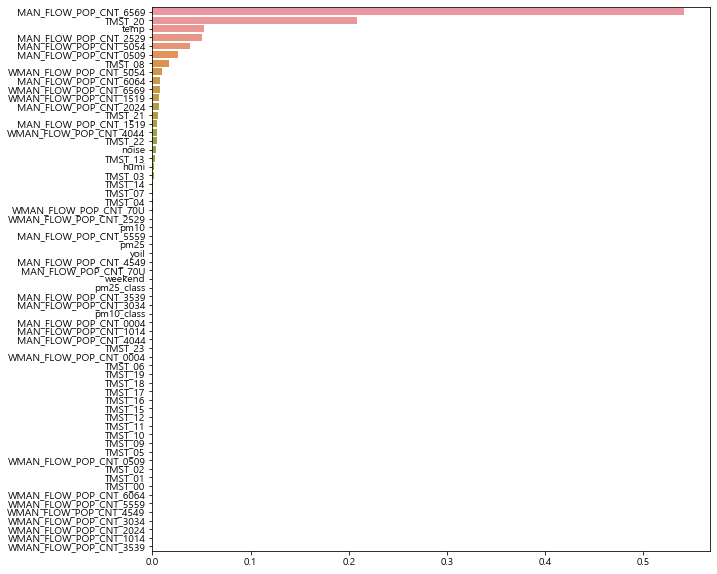

In [ ]:
###importance plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)

plt.figure(figsize = (10,10))
sns.barplot(x=ftr_sort, y = ftr_sort.index)
plt.show()


![image.png](attachment:image.png)

In [ ]:
data.columns

Index(['sales_index', 'food_rate', 'snack_rate', 'drink_rate',
       'homeliving_rate', 'health_rate', 'hobby_rate', 'social_rate',
       'baby_rate', 'food_index', 'snack_index', 'drink_index',
       'homeliving_index', 'health_index', 'hobby_index', 'social_index',
       'baby_index', 'humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'AREA', 'LENGTH', 'X_COORD',
       'Y_COORD', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',

In [ ]:
data= gsppds[['sales_index', 'food_rate', 'snack_rate','dong',
       'drink_rate', 'homeliving_rate', 'health_rate', 'hobby_rate',
       'social_rate', 'baby_rate', 'food_index', 'snack_index', 'drink_index',
       'homeliving_index', 'health_index', 'hobby_index', 'social_index',
       'baby_index', 'humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'AREA', 'LENGTH', 'X_COORD',
       'Y_COORD', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

In [ ]:
data = data[(data['dong']=='종로1,2,3,4가동')|(data['dong']=='중계1동')|(data['dong']=='상계1동')|(data['dong']=='이화동')|(data['dong']=='종로5,6가동')|(data['dong']=='상계6,7동')|(data['dong']=='중계3동')|(data['dong']=='공릉1동')|(data['dong']=='상계2동')|(data['dong']=='사직동')]

In [ ]:
data1=  data.copy()

In [ ]:
data1 = data1.dropna(axis = 0)
data1 = data1[['sales_index', 'food_rate', 'snack_rate',
       'drink_rate', 'homeliving_rate', 'health_rate', 'hobby_rate',
       'social_rate', 'baby_rate', 'food_index', 'snack_index', 'drink_index',
       'homeliving_index', 'health_index', 'hobby_index', 'social_index',
       'baby_index', 'humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'AREA', 'LENGTH', 'X_COORD',
       'Y_COORD', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

In [ ]:

y = data1.sales_index
x = data1[data1.columns[data1.columns!='sales_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)
imp_var = ftr_sort[ftr_sort>0]
print(imp_var)

훈련 세트 정확도: 0.956
테스트 세트 정확도: 0.912
drink_index               0.785020
snack_index               0.091423
food_index                0.057324
drink_rate                0.046356
food_rate                 0.010632
LENGTH                    0.002730
noise                     0.002456
WMAN_FLOW_POP_CNT_0509    0.001518
WMAN_FLOW_POP_CNT_1519    0.001289
health_index              0.001254
dtype: float64


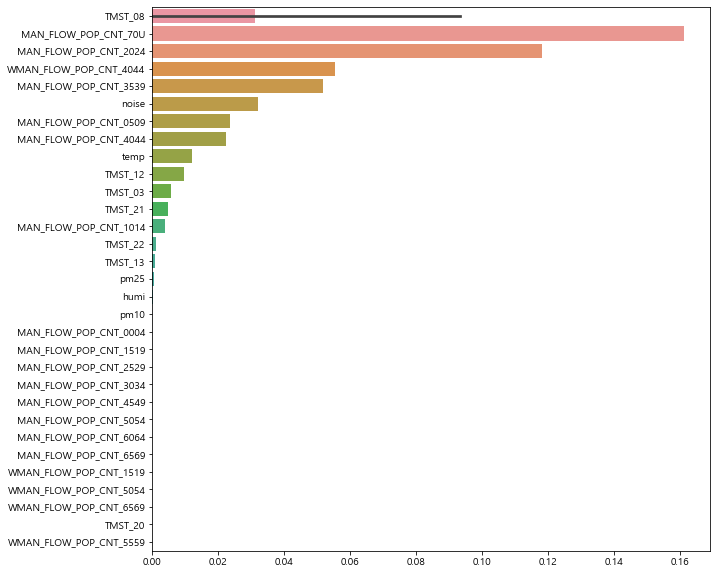

In [ ]:
###importance plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)

plt.figure(figsize = (10,10))
sns.barplot(x=ftr_sort, y = ftr_sort.index)
plt.show()


In [ ]:
gsppds.columns

Index(['tm', 'gu', 'dong', 'sales_index', 'food_rate', 'snack_rate',
       'drink_rate', 'homeliving_rate', 'health_rate', 'hobby_rate',
       'social_rate', 'baby_rate', 'food_index', 'snack_index', 'drink_index',
       'homeliving_index', 'health_index', 'hobby_index', 'social_index',
       'baby_index', 'humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'AREA', 'LENGTH', 'X_COORD',
       'Y_COORD', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN

## 매출업종별로 유의미한 변수 의사결정나무로 확인하기

## food_index

In [ ]:
datf = data1[['food_index','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

In [ ]:
datf= datf.dropna(axis = 0)
y = datf.food_index
x = datf[datf.columns[datf.columns!='food_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)
imp_var = ftr_sort[ftr_sort>0]
print(imp_var)

훈련 세트 정확도: 0.815
테스트 세트 정확도: 0.239
TMST_08                   0.473883
MAN_FLOW_POP_CNT_70U      0.159256
MAN_FLOW_POP_CNT_6064     0.149524
WMAN_FLOW_POP_CNT_1519    0.083207
TMST_07                   0.046981
noise                     0.033054
WMAN_FLOW_POP_CNT_3034    0.027359
WMAN_FLOW_POP_CNT_4044    0.007659
MAN_FLOW_POP_CNT_3539     0.006552
temp                      0.003720
TMST_18                   0.003568
TMST_11                   0.002384
TMST_12                   0.001486
TMST_15                   0.001164
WMAN_FLOW_POP_CNT_4549    0.000203
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("랜덤숲훈련정확도 :",model.score(X_train, y_train)) #
print("랜덤숲테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("그래디언트훈련정확도 :",model.score(X_train, y_train)) #
print("그래디언트테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


랜덤숲훈련정확도 : 0.9349230895641152
랜덤숲테스트정확도 : 0.5798301399580945
그래디언트훈련정확도 : 0.9273249886745308
그래디언트테스트정확도 : 0.5643359915118126


## snack_index

In [ ]:
dats = data1[['snack_index','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

In [ ]:
dats = dats.dropna(axis = 0)
y = dats.snack_index
x = dats[dats.columns[dats.columns!='snack_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)
imp_var = ftr_sort[ftr_sort>0]
print(imp_var)

훈련 세트 정확도: 0.525
테스트 세트 정확도: 0.234
TMST_08                   0.376382
WMAN_FLOW_POP_CNT_1519    0.129954
TMST_07                   0.122967
humi                      0.063716
MAN_FLOW_POP_CNT_6064     0.062964
WMAN_FLOW_POP_CNT_5054    0.052915
MAN_FLOW_POP_CNT_70U      0.031480
MAN_FLOW_POP_CNT_6569     0.028426
MAN_FLOW_POP_CNT_0004     0.024703
TMST_11                   0.021832
noise                     0.021703
TMST_22                   0.018300
temp                      0.011166
TMST_18                   0.010374
TMST_04                   0.007566
TMST_15                   0.006914
WMAN_FLOW_POP_CNT_0004    0.005142
MAN_FLOW_POP_CNT_1519     0.003006
TMST_05                   0.000454
WMAN_FLOW_POP_CNT_6569    0.000037
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("랜덤숲훈련정확도 :",model.score(X_train, y_train)) #
print("랜덤숲테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("그래디언트훈련정확도 :",model.score(X_train, y_train)) #
print("그래디언트테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


랜덤숲훈련정확도 : 0.9018765373240931
랜덤숲테스트정확도 : 0.45488690847244495
그래디언트훈련정확도 : 0.8195517696679483
그래디언트테스트정확도 : 0.5133856814133746


### drink_index

In [ ]:
datd = data1[['drink_index','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

In [ ]:
datd = datd.dropna(axis = 0)
y = datd.drink_index
x = datd[datd.columns[datd.columns!='drink_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)
imp_var = ftr_sort[ftr_sort>0]
print(imp_var)

훈련 세트 정확도: 0.799
테스트 세트 정확도: 0.734
TMST_08                   0.514733
temp                      0.152358
MAN_FLOW_POP_CNT_2529     0.066963
noise                     0.047670
MAN_FLOW_POP_CNT_2024     0.040643
MAN_FLOW_POP_CNT_6569     0.039490
WMAN_FLOW_POP_CNT_2529    0.032780
TMST_13                   0.030591
MAN_FLOW_POP_CNT_1014     0.024642
MAN_FLOW_POP_CNT_6064     0.015232
WMAN_FLOW_POP_CNT_2024    0.008884
MAN_FLOW_POP_CNT_4044     0.008707
WMAN_FLOW_POP_CNT_0509    0.007457
TMST_14                   0.003281
MAN_FLOW_POP_CNT_70U      0.002664
WMAN_FLOW_POP_CNT_70U     0.001837
TMST_02                   0.001028
TMST_04                   0.000580
MAN_FLOW_POP_CNT_5559     0.000461
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("랜덤숲훈련정확도 :",model.score(X_train, y_train)) #
print("랜덤숲테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("그래디언트훈련정확도 :",model.score(X_train, y_train)) #
print("그래디언트테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


랜덤숲훈련정확도 : 0.9803916117754861
랜덤숲테스트정확도 : 0.894637516282021
그래디언트훈련정확도 : 0.9452120129031831
그래디언트테스트정확도 : 0.8998765579788573


In [ ]:
dath = data1[['homeliving_index','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

In [ ]:
dath = dath.dropna(axis = 0)
y = dath.homeliving_index
x = dath[dath.columns[dath.columns!='homeliving_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)
imp_var = ftr_sort[ftr_sort>0]
print(imp_var)

훈련 세트 정확도: 0.425
테스트 세트 정확도: 0.000
MAN_FLOW_POP_CNT_70U      0.314879
WMAN_FLOW_POP_CNT_5054    0.221754
WMAN_FLOW_POP_CNT_2024    0.114955
TMST_23                   0.073314
TMST_18                   0.048159
TMST_09                   0.035054
humi                      0.032113
WMAN_FLOW_POP_CNT_0509    0.024666
TMST_14                   0.022867
TMST_03                   0.018823
noise                     0.018160
MAN_FLOW_POP_CNT_0509     0.017164
TMST_16                   0.014240
pm10                      0.013258
WMAN_FLOW_POP_CNT_0004    0.009502
TMST_20                   0.007997
TMST_07                   0.005809
TMST_19                   0.004958
temp                      0.002329
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("랜덤숲훈련정확도 :",model.score(X_train, y_train)) #
print("랜덤숲테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("그래디언트훈련정확도 :",model.score(X_train, y_train)) #
print("그래디언트테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


랜덤숲훈련정확도 : 0.8635991204555672
랜덤숲테스트정확도 : 0.2556476983764274
그래디언트훈련정확도 : 0.6774953358910205
그래디언트테스트정확도 : 0.2773558186117997


In [ ]:
datb = data1[['health_index','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

datb = datb.dropna(axis = 0)
y = datb.health_index
x = datb[datb.columns[datb.columns!='health_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)
imp_var = ftr_sort[ftr_sort>0]
print(imp_var)

훈련 세트 정확도: 0.653
테스트 세트 정확도: 0.344
WMAN_FLOW_POP_CNT_3034    0.347677
noise                     0.139178
humi                      0.125243
MAN_FLOW_POP_CNT_3034     0.076943
MAN_FLOW_POP_CNT_70U      0.059286
TMST_23                   0.053382
WMAN_FLOW_POP_CNT_2024    0.050900
TMST_04                   0.049966
TMST_05                   0.021962
TMST_02                   0.018266
yoil                      0.018146
TMST_00                   0.009154
temp                      0.006472
WMAN_FLOW_POP_CNT_6569    0.006425
TMST_19                   0.005987
TMST_20                   0.003841
WMAN_FLOW_POP_CNT_1519    0.002606
WMAN_FLOW_POP_CNT_1014    0.002032
TMST_10                   0.001785
WMAN_FLOW_POP_CNT_6064    0.000714
pm10                      0.000035
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("랜덤숲훈련정확도 :",model.score(X_train, y_train)) #
print("랜덤숲테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("그래디언트훈련정확도 :",model.score(X_train, y_train)) #
print("그래디언트테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


랜덤숲훈련정확도 : 0.9097829929592237
랜덤숲테스트정확도 : 0.5099235682765799
그래디언트훈련정확도 : 0.8430039315461989
그래디언트테스트정확도 : 0.4856400527348718


hobby_

In [ ]:
daty = data1[['hobby_index','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

daty = daty.dropna(axis = 0)
y = daty.hobby_index
x = daty[daty.columns[daty.columns!='hobby_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)
imp_var = ftr_sort[ftr_sort>0]
print(imp_var)

훈련 세트 정확도: 0.592
테스트 세트 정확도: -0.083
pm25                      4.593524e-01
MAN_FLOW_POP_CNT_5559     3.669076e-01
MAN_FLOW_POP_CNT_2529     4.912784e-02
MAN_FLOW_POP_CNT_4549     2.605735e-02
noise                     2.325696e-02
WMAN_FLOW_POP_CNT_1014    1.506745e-02
WMAN_FLOW_POP_CNT_2529    1.174144e-02
TMST_20                   1.159190e-02
yoil                      1.012885e-02
MAN_FLOW_POP_CNT_6569     9.576049e-03
MAN_FLOW_POP_CNT_2024     8.235976e-03
TMST_22                   3.706782e-03
WMAN_FLOW_POP_CNT_4549    1.511572e-03
TMST_04                   1.120080e-03
TMST_16                   9.850148e-04
WMAN_FLOW_POP_CNT_0509    9.021112e-04
MAN_FLOW_POP_CNT_1014     5.791391e-04
WMAN_FLOW_POP_CNT_5559    1.239900e-04
TMST_02                   1.445968e-05
TMST_13                   1.214155e-05
pm10                      8.711254e-07
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("랜덤숲훈련정확도 :",model.score(X_train, y_train)) #
print("랜덤숲테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("그래디언트훈련정확도 :",model.score(X_train, y_train)) #
print("그래디언트테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


랜덤숲훈련정확도 : 0.8805131132183914
랜덤숲테스트정확도 : -0.1459546460191794
그래디언트훈련정확도 : 0.7898307694334261
그래디언트테스트정확도 : -0.08043056122329006


In [ ]:
dats = data1[['social_index','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

dats = dats.dropna(axis = 0)
y = dats.social_index
x = dats[dats.columns[dats.columns!='social_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)
imp_var = ftr_sort[ftr_sort>0]
print(imp_var)

훈련 세트 정확도: 0.672
테스트 세트 정확도: 0.540
WMAN_FLOW_POP_CNT_3034    0.386044
noise                     0.175754
TMST_00                   0.094410
TMST_04                   0.088495
WMAN_FLOW_POP_CNT_2024    0.070170
TMST_20                   0.047841
TMST_03                   0.030915
WMAN_FLOW_POP_CNT_2529    0.019861
MAN_FLOW_POP_CNT_5559     0.019527
MAN_FLOW_POP_CNT_6569     0.017566
TMST_17                   0.007163
TMST_15                   0.005802
MAN_FLOW_POP_CNT_3034     0.004583
WMAN_FLOW_POP_CNT_1014    0.004523
TMST_19                   0.004488
TMST_09                   0.003962
MAN_FLOW_POP_CNT_4549     0.003922
TMST_10                   0.002947
MAN_FLOW_POP_CNT_0509     0.002844
MAN_FLOW_POP_CNT_1014     0.002459
TMST_21                   0.002341
WMAN_FLOW_POP_CNT_0004    0.001490
TMST_05                   0.001134
TMST_06                   0.000990
TMST_11                   0.000439
pm25                      0.000329
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("랜덤숲훈련정확도 :",model.score(X_train, y_train)) #
print("랜덤숲테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("그래디언트훈련정확도 :",model.score(X_train, y_train)) #
print("그래디언트테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


랜덤숲훈련정확도 : 0.9315619902476469
랜덤숲테스트정확도 : 0.5893073170100339
그래디언트훈련정확도 : 0.7941622227189579
그래디언트테스트정확도 : 0.62107073581283


In [ ]:
datb = data1[['baby_index','humi', 'noise', 'pm10', 'pm25', 'temp', 'yoil',
       'weekend', 'pm25_class', 'pm10_class', 'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23']]

datb = datb.dropna(axis = 0)
y = datb.baby_index
x = datb[datb.columns[datb.columns!='baby_index']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
### 모델 생성
rm = DecisionTreeRegressor(max_depth = 5)
model = rm.fit(X_train, y_train)
###하이퍼 파라미터

###정확도
print("훈련 세트 정확도: {:.3f}".format(rm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rm.score(X_test, y_test)))

ftr_importances_values = rm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)
imp_var = ftr_sort[ftr_sort>0]
print(imp_var)

훈련 세트 정확도: 0.471
테스트 세트 정확도: 0.283
noise                     0.240209
MAN_FLOW_POP_CNT_1014     0.196742
weekend                   0.164575
TMST_08                   0.087446
WMAN_FLOW_POP_CNT_6569    0.045737
TMST_13                   0.040224
MAN_FLOW_POP_CNT_1519     0.034908
TMST_12                   0.033140
WMAN_FLOW_POP_CNT_1014    0.030790
pm25                      0.028618
MAN_FLOW_POP_CNT_2024     0.023742
WMAN_FLOW_POP_CNT_3034    0.021248
temp                      0.014065
WMAN_FLOW_POP_CNT_5559    0.014012
TMST_01                   0.006509
TMST_21                   0.006002
WMAN_FLOW_POP_CNT_4549    0.004471
TMST_11                   0.003464
WMAN_FLOW_POP_CNT_2024    0.002198
WMAN_FLOW_POP_CNT_6064    0.001869
humi                      0.000032
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("랜덤숲훈련정확도 :",model.score(X_train, y_train)) #
print("랜덤숲테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("그래디언트훈련정확도 :",model.score(X_train, y_train)) #
print("그래디언트테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


랜덤숲훈련정확도 : 0.8669492828069405
랜덤숲테스트정확도 : 0.37785178176365974
그래디언트훈련정확도 : 0.6982250881910357
그래디언트테스트정확도 : 0.39686603097875395


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("랜덤숲훈련정확도 :",model.score(X_train, y_train)) #
print("랜덤숲테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538

## 업종별 매출지수를 의사결정나무로 분석해본 결과 
미세먼지가 유의미한 변수에 있는 경우는  baby, social, health&beauty,snackindex가 있었다. 

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeRegressor()
param_grid = {'criterion':['mse'], 'max_depth':[None,2,3,4,5,6]}
#param_grid = {'criterion':['mse','friedman_mse','mae'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3], max_features:[None,'sqrt','log2',3,4,5]}

grid = GridSearchCV(estimator, param_grid=param_grid) 
#grid = GridSearchCV(estimator, param_grid=param_grid, cv=3, scoring='r2') #디폴트로 cv=3, 회귀에서 디폴트로 scoring='r2'

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
df = pd.DataFrame(grid.cv_results_)
print(df)
#print(df.sort_values(by='param_max_depth'))
#print(df.sort_values(by='param_max_depth', ascending=0))
#print(df.sort_values(by='rank_test_score'))

estimator = grid.best_estimator_

## GradientBoostRegressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

##########모델 검증

print(model.score(X_train, y_train)) #
print(model.score(X_test, y_test)) #0.7421680021828538

0.8469884866759818
0.6996338292109977


## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

##########모델 검증

print("랜덤숲훈련정확도 :",model.score(X_train, y_train)) #
print("랜덤숲테스트정확도 :",model.score(X_test, y_test)) #0.7421680021828538

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


랜덤숲훈련정확도 : 0.8818193275525098
랜덤숲테스트정확도 : 0.33546346999200816
